**Importing Required Libraries**

In [ ]:
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import plotly as px
import matplotlib.dates as mtd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns


**Loading Datasets 2021 January,February,March,April,May**

In [ ]:
flightdataframeJan = pd.read_csv('/content/drive/MyDrive/AbiML/Internship Tasks/internshipDatas/flightdataJanuary.csv')
flightdataframeFeb = pd.read_csv('/content/drive/MyDrive/AbiML/Internship Tasks/internshipDatas/flightdataFebruary.csv')
flightdataframeMar = pd.read_csv('/content/drive/MyDrive/AbiML/Internship Tasks/internshipDatas/flightdataMarch.csv')
flightdataframeApr = pd.read_csv('/content/drive/MyDrive/AbiML/Internship Tasks/internshipDatas/flightdataAprilcsv.txt')
flightdataframeMay = pd.read_csv('/content/drive/MyDrive/AbiML/Internship Tasks/internshipDatas/flightdataMay.csv')

Viewing first 5 datas 

In [ ]:
flightdataframeJan.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,MKT_UNIQUE_CARRIER,BRANDED_CODE_SHARE,MKT_CARRIER_AIRLINE_ID,MKT_CARRIER,MKT_CARRIER_FL_NUM,SCH_OP_UNIQUE_CARRIER,SCH_OP_CARRIER_AIRLINE_ID,SCH_OP_CARRIER,SCH_OP_CARRIER_FL_NUM,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,DEP_TIME_BLK,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,ARR_TIME_BLK,CANCELLED,CANCELLATION_CODE,DIVERTED,DUP,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,FIRST_DEP_TIME,TOTAL_ADD_GTIME,LONGEST_ADD_GTIME,Unnamed: 74
0,2021,1,1,17,7,2021-01-17,DL,DL,19790,DL,1089,NaN,NaN,NaN,NaN,DL,19790,DL,N326NB,1089,11298,1129806,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,1153,1151.0,-2.0,0.0,0.0,-1.0,1100-1159,28.0,1219.0,1525.0,11.0,1523,1536.0,13.0,13.0,0.0,0.0,1500-1559,0.0,NaN,0.0,N,150.0,165.0,126.0,1.0,986.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021,1,1,17,7,2021-01-17,DL,DL,19790,DL,1090,NaN,NaN,NaN,NaN,DL,19790,DL,N702TW,1090,14747,1474703,30559,SEA,"Seattle, WA",WA,53,Washington,93,14869,1486903,34614,SLC,"Salt Lake City, UT",UT,49,Utah,87,718,716.0,-2.0,0.0,0.0,-1.0,0700-0759,13.0,729.0,949.0,16.0,1019,1005.0,-14.0,0.0,0.0,-1.0,1000-1059,0.0,NaN,0.0,N,121.0,109.0,80.0,1.0,689.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021,1,1,17,7,2021-01-17,DL,DL,19790,DL,1091,NaN,NaN,NaN,NaN,DL,19790,DL,N909DN,1091,14869,1486903,34614,SLC,"Salt Lake City, UT",UT,49,Utah,87,14747,1474703,30559,SEA,"Seattle, WA",WA,53,Washington,93,959,953.0,-6.0,0.0,0.0,-1.0,0900-0959,26.0,1019.0,1111.0,5.0,1129,1116.0,-13.0,0.0,0.0,-1.0,1100-1159,0.0,NaN,0.0,N,150.0,143.0,112.0,1.0,689.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021,1,1,17,7,2021-01-17,DL,DL,19790,DL,1092,NaN,NaN,NaN,NaN,DL,19790,DL,N908DN,1092,14027,1402702,34027,PBI,"West Palm Beach/Palm Beach, FL",FL,12,Florida,33,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,1255,1250.0,-5.0,0.0,0.0,-1.0,1200-1259,14.0,1304.0,1518.0,8.0,1544,1526.0,-18.0,0.0,0.0,-2.0,1500-1559,0.0,NaN,0.0,N,169.0,156.0,134.0,1.0,1086.0,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021,1,1,17,7,2021-01-17,DL,DL,19790,DL,1093,NaN,NaN,NaN,NaN,DL,19790,DL,N363DN,1093,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,15304,1530402,33195,TPA,"Tampa, FL",FL,12,Florida,33,833,830.0,-3.0,0.0,0.0,-1.0,0800-0859,40.0,910.0,1137.0,3.0,1126,1140.0,14.0,14.0,0.0,0.0,1100-1159,0.0,NaN,0.0,N,173.0,190.0,147.0,1.0,983.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**viewing columns count and shape pf dataset**

In [ ]:
flightdataframeJan.columns

Index(['YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'FL_DATE',
       'MKT_UNIQUE_CARRIER', 'BRANDED_CODE_SHARE', 'MKT_CARRIER_AIRLINE_ID',
       'MKT_CARRIER', 'MKT_CARRIER_FL_NUM', 'SCH_OP_UNIQUE_CARRIER',
       'SCH_OP_CARRIER_AIRLINE_ID', 'SCH_OP_CARRIER', 'SCH_OP_CARRIER_FL_NUM',
       'OP_UNIQUE_CARRIER', 'OP_CARRIER_AIRLINE_ID', 'OP_CARRIER', 'TAIL_NUM',
       'OP_CARRIER_FL_NUM', 'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID',
       'ORIGIN_CITY_MARKET_ID', 'ORIGIN', 'ORIGIN_CITY_NAME',
       'ORIGIN_STATE_ABR', 'ORIGIN_STATE_FIPS', 'ORIGIN_STATE_NM',
       'ORIGIN_WAC', 'DEST_AIRPORT_ID', 'DEST_AIRPORT_SEQ_ID',
       'DEST_CITY_MARKET_ID', 'DEST', 'DEST_CITY_NAME', 'DEST_STATE_ABR',
       'DEST_STATE_FIPS', 'DEST_STATE_NM', 'DEST_WAC', 'CRS_DEP_TIME',
       'DEP_TIME', 'DEP_DELAY', 'DEP_DELAY_NEW', 'DEP_DEL15',
       'DEP_DELAY_GROUP', 'DEP_TIME_BLK', 'TAXI_OUT', 'WHEELS_OFF',
       'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY',
      

In [ ]:
flightdataframeMay.shape

(520059, 75)

**concatenating all 5 dataframes along rows**

In [ ]:
# concatenating df1 and df2 along rows
consolidatedfivemonthsdf = pd.concat([flightdataframeJan,flightdataframeFeb,flightdataframeMar,flightdataframeApr,flightdataframeMay], axis=0)

In [ ]:
consolidatedfivemonthsdf.shape

(2190675, 75)

In [ ]:
#consolidatedfivemonthsdf.iloc[:,:20].isnull().sum()

In [ ]:
#consolidatedfivemonthsdf.iloc[:,20:40].isnull().sum()

In [ ]:
#consolidatedfivemonthsdf.iloc[:,40:74].isnull().sum()

In [ ]:
consolidatedfivemonthsdf1=consolidatedfivemonthsdf.drop(columns=['Unnamed: 74'] ,axis=1)

In [ ]:
consolidatedfivemonthsdf1.shape

(2190675, 74)

Column Selection


In [ ]:
consolidatedSelectedColumns=consolidatedfivemonthsdf1[['YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'FL_DATE','MKT_UNIQUE_CARRIER','MKT_CARRIER','MKT_CARRIER_FL_NUM','OP_UNIQUE_CARRIER','OP_CARRIER','OP_CARRIER_FL_NUM','ORIGIN_AIRPORT_ID','ORIGIN','ORIGIN_CITY_NAME','ORIGIN_WAC','DEST_AIRPORT_ID','DEST','DEST_CITY_NAME','DEST_WAC','DEP_DELAY','DEP_DELAY_NEW', 'DEP_DEL15','DEP_DELAY_GROUP','TAXI_OUT','ARR_DELAY','ARR_DELAY_NEW', 'ARR_DEL15','ARR_DELAY_GROUP','TAXI_IN','CANCELLED','CANCELLATION_CODE','DIVERTED','AIR_TIME','DISTANCE','DISTANCE_GROUP', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY','SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']]

In [ ]:
consolidatedSelectedColumns.shape

(2190675, 41)

# Checking Null Values for selected columns

In [ ]:
consolidatedSelectedColumns.isnull().sum()

YEAR                         0
QUARTER                      0
MONTH                        0
DAY_OF_MONTH                 0
DAY_OF_WEEK                  0
FL_DATE                      0
MKT_UNIQUE_CARRIER           0
MKT_CARRIER                  0
MKT_CARRIER_FL_NUM           0
OP_UNIQUE_CARRIER            0
OP_CARRIER                   0
OP_CARRIER_FL_NUM            0
ORIGIN_AIRPORT_ID            0
ORIGIN                       0
ORIGIN_CITY_NAME             0
ORIGIN_WAC                   0
DEST_AIRPORT_ID              0
DEST                         0
DEST_CITY_NAME               0
DEST_WAC                     0
DEP_DELAY                34535
DEP_DELAY_NEW            34535
DEP_DEL15                34535
DEP_DELAY_GROUP          34535
TAXI_OUT                 34962
ARR_DELAY                39379
ARR_DELAY_NEW            39379
ARR_DEL15                39379
ARR_DELAY_GROUP          39379
TAXI_IN                  35566
CANCELLED                    0
CANCELLATION_CODE      2155504
DIVERTED

In [ ]:
#consolidatedSelectedColumns.corr()

### **“CANCELLED” and “DIVERTED” columns with missing values.**

Checking unique value counts in cancelled

In [ ]:
consolidatedSelectedColumns['CANCELLED'].value_counts()

0.0    2155504
1.0      35171
Name: CANCELLED, dtype: int64

In [ ]:
consolidatedSelectedColumns[consolidatedSelectedColumns['CANCELLED']==1].isna().sum()

YEAR                       0
QUARTER                    0
MONTH                      0
DAY_OF_MONTH               0
DAY_OF_WEEK                0
FL_DATE                    0
MKT_UNIQUE_CARRIER         0
MKT_CARRIER                0
MKT_CARRIER_FL_NUM         0
OP_UNIQUE_CARRIER          0
OP_CARRIER                 0
OP_CARRIER_FL_NUM          0
ORIGIN_AIRPORT_ID          0
ORIGIN                     0
ORIGIN_CITY_NAME           0
ORIGIN_WAC                 0
DEST_AIRPORT_ID            0
DEST                       0
DEST_CITY_NAME             0
DEST_WAC                   0
DEP_DELAY              34535
DEP_DELAY_NEW          34535
DEP_DEL15              34535
DEP_DELAY_GROUP        34535
TAXI_OUT               34962
ARR_DELAY              35171
ARR_DELAY_NEW          35171
ARR_DEL15              35171
ARR_DELAY_GROUP        35171
TAXI_IN                35171
CANCELLED                  0
CANCELLATION_CODE          0
DIVERTED                   0
AIR_TIME               35171
DISTANCE      

***The number of cancelled flights is equal to the missing values in delays column , from the above we can confirm that its because of cancelled flights.***

Checking Same with Diverted

In [ ]:
consolidatedSelectedColumns['DIVERTED'].value_counts()

0.0    2186467
1.0       4208
Name: DIVERTED, dtype: int64

In [ ]:
consolidatedSelectedColumns[consolidatedSelectedColumns['DIVERTED']==1].isna().sum()

YEAR                      0
QUARTER                   0
MONTH                     0
DAY_OF_MONTH              0
DAY_OF_WEEK               0
FL_DATE                   0
MKT_UNIQUE_CARRIER        0
MKT_CARRIER               0
MKT_CARRIER_FL_NUM        0
OP_UNIQUE_CARRIER         0
OP_CARRIER                0
OP_CARRIER_FL_NUM         0
ORIGIN_AIRPORT_ID         0
ORIGIN                    0
ORIGIN_CITY_NAME          0
ORIGIN_WAC                0
DEST_AIRPORT_ID           0
DEST                      0
DEST_CITY_NAME            0
DEST_WAC                  0
DEP_DELAY                 0
DEP_DELAY_NEW             0
DEP_DEL15                 0
DEP_DELAY_GROUP           0
TAXI_OUT                  0
ARR_DELAY              4208
ARR_DELAY_NEW          4208
ARR_DEL15              4208
ARR_DELAY_GROUP        4208
TAXI_IN                 395
CANCELLED                 0
CANCELLATION_CODE      4208
DIVERTED                  0
AIR_TIME               4208
DISTANCE                  0
DISTANCE_GROUP      

The number of Diverted flights is equal to the missing values in ***delays column and cancellation code***, therefore lets confirm that Nullvalues are because of Diverted flights. 

## **Null Value Treatment**

Since we are going to deal with delays, we can delete null values caused by Cancellation and diverted in delay columns to reduce null values
* Based on cancelled and diverted we need to delete only  4208+35171=39379 rows only on 'DEP_DELAY','DEP_DELAY_NEW' ,'DEP_DEL15','DEP_DELAY_GROUP' ,'ARR_DELAY' ,'ARR_DELAY_NEW','ARR_DEL15','ARR_DELAY_GROUP'where their null values equal to 39379 

In [ ]:
consolidatedSelectedColumns.dropna(subset=['DEP_DELAY','DEP_DELAY_NEW' ,'DEP_DEL15','DEP_DELAY_GROUP' ,'ARR_DELAY' ,'ARR_DELAY_NEW','ARR_DEL15','ARR_DELAY_GROUP'],inplace=True)


In [ ]:
month_all=consolidatedSelectedColumns[consolidatedSelectedColumns['MONTH']==1]

monthjandepdelTable=month_all[month_all['ARR_DEL15']==1]

In [ ]:
consolidatedSelectedColumns.shape

(2151296, 41)

In [ ]:
consolidatedSelectedColumns['DIVERTED'].value_counts()

0.0    2151296
Name: DIVERTED, dtype: int64

In [ ]:
consolidatedSelectedColumns['CANCELLED'].value_counts()

0.0    2151296
Name: CANCELLED, dtype: int64

Diverted and Cancelled having onlu '0' value. so lets drop those columns

In [ ]:
consolidatedSelectedColumns.drop(['CANCELLED','DIVERTED'], axis=1, inplace=True)


In [ ]:
consolidatedSelectedColumns.shape

(2151296, 39)

Renaming MKT_CARRIER,OP_CARRIER as IATA_mkt_carriercode,IATA_op_carriercode

In [ ]:
consolidatedSelectedColumns.rename(columns={'MKT_CARRIER': 'IATA_mkt_carriercode','OP_CARRIER': 'IATA_op_carriercode'}, inplace=True)

In [ ]:
consolidatedSelectedColumns.isna().sum()

YEAR                          0
QUARTER                       0
MONTH                         0
DAY_OF_MONTH                  0
DAY_OF_WEEK                   0
FL_DATE                       0
MKT_UNIQUE_CARRIER            0
IATA_mkt_carriercode          0
MKT_CARRIER_FL_NUM            0
OP_UNIQUE_CARRIER             0
IATA_op_carriercode           0
OP_CARRIER_FL_NUM             0
ORIGIN_AIRPORT_ID             0
ORIGIN                        0
ORIGIN_CITY_NAME              0
ORIGIN_WAC                    0
DEST_AIRPORT_ID               0
DEST                          0
DEST_CITY_NAME                0
DEST_WAC                      0
DEP_DELAY                     0
DEP_DELAY_NEW                 0
DEP_DEL15                     0
DEP_DELAY_GROUP               0
TAXI_OUT                      0
ARR_DELAY                     0
ARR_DELAY_NEW                 0
ARR_DEL15                     0
ARR_DELAY_GROUP               0
TAXI_IN                       0
CANCELLATION_CODE       2151296
AIR_TIME

In [ ]:
consolidatedSelectedColumns.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2151296 entries, 0 to 520058
Data columns (total 39 columns):
 #   Column                Dtype  
---  ------                -----  
 0   YEAR                  int64  
 1   QUARTER               int64  
 2   MONTH                 int64  
 3   DAY_OF_MONTH          int64  
 4   DAY_OF_WEEK           int64  
 5   FL_DATE               object 
 6   MKT_UNIQUE_CARRIER    object 
 7   IATA_mkt_carriercode  object 
 8   MKT_CARRIER_FL_NUM    int64  
 9   OP_UNIQUE_CARRIER     object 
 10  IATA_op_carriercode   object 
 11  OP_CARRIER_FL_NUM     int64  
 12  ORIGIN_AIRPORT_ID     int64  
 13  ORIGIN                object 
 14  ORIGIN_CITY_NAME      object 
 15  ORIGIN_WAC            int64  
 16  DEST_AIRPORT_ID       int64  
 17  DEST                  object 
 18  DEST_CITY_NAME        object 
 19  DEST_WAC              int64  
 20  DEP_DELAY             float64
 21  DEP_DELAY_NEW         float64
 22  DEP_DEL15             float64
 23  DEP_DELA

# OUTLIER CHECKING

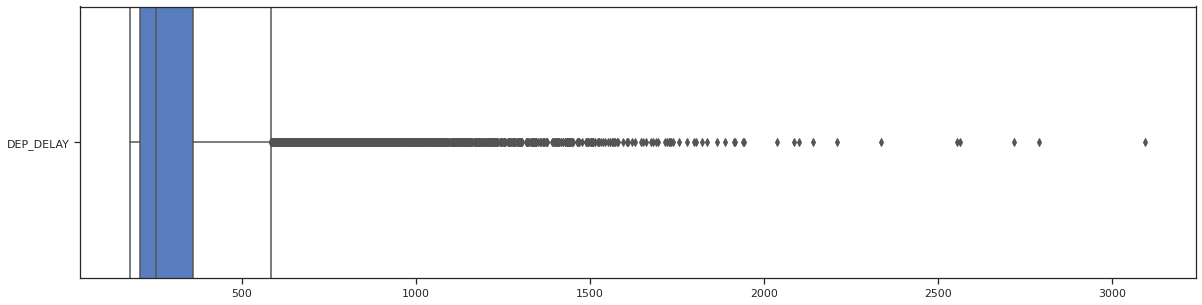

In [ ]:
#data=pd.DataFrame(data)
#data1=pd.DataFrame(data1)
#data2=pd.DataFrame(data2)
data1 = consolidatedSelectedColumns[['DEP_DELAY']][consolidatedSelectedColumns['DEP_DELAY']>=180]
plt.rc("figure", figsize=(20, 5))
ax = sns.boxplot(data=data1, orient="h",width=30)


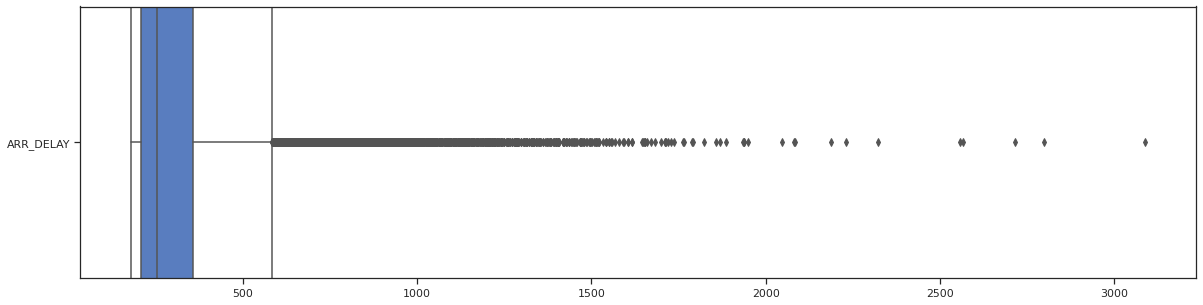

In [ ]:
data2 = consolidatedSelectedColumns[['ARR_DELAY']][consolidatedSelectedColumns['ARR_DELAY']>=180]
plt.rc("figure", figsize=(20, 5))
ax = sns.boxplot(data=data2, orient="h",width=30)

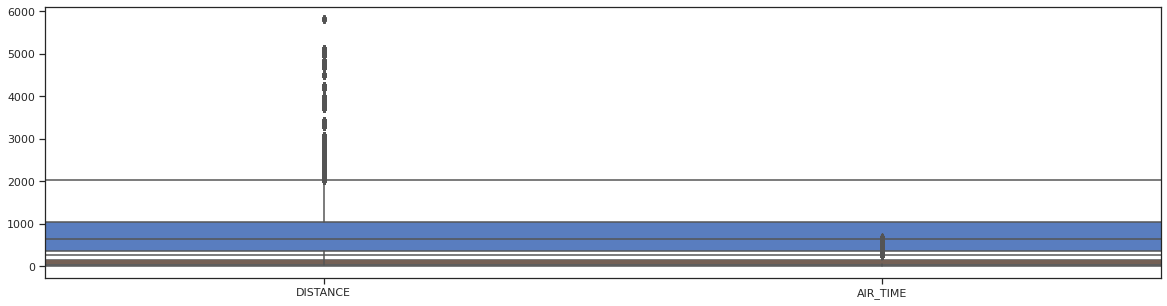

In [ ]:
data3 = consolidatedSelectedColumns[['DISTANCE','AIR_TIME']]
plt.rc("figure", figsize=(20, 5))
ax = sns.boxplot(data=data3,width=30)

finding distance and Air time lower bound outliers ,because distance and Air time can't be negative 

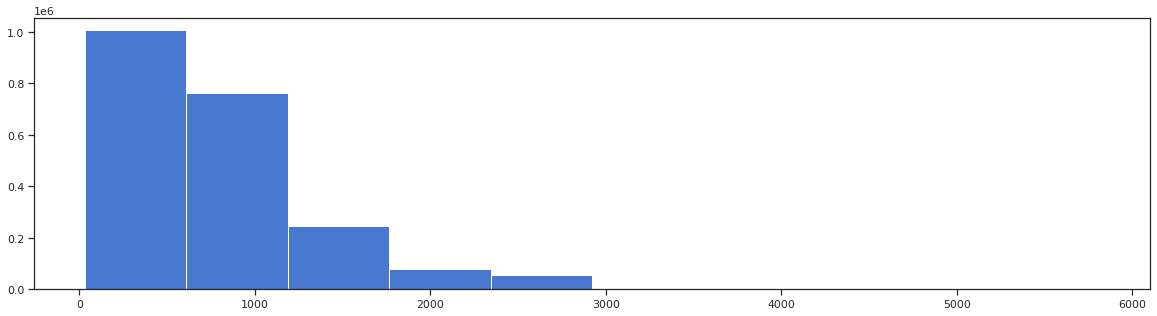

In [ ]:
plt.hist(consolidatedSelectedColumns['DISTANCE'])
plt.show()

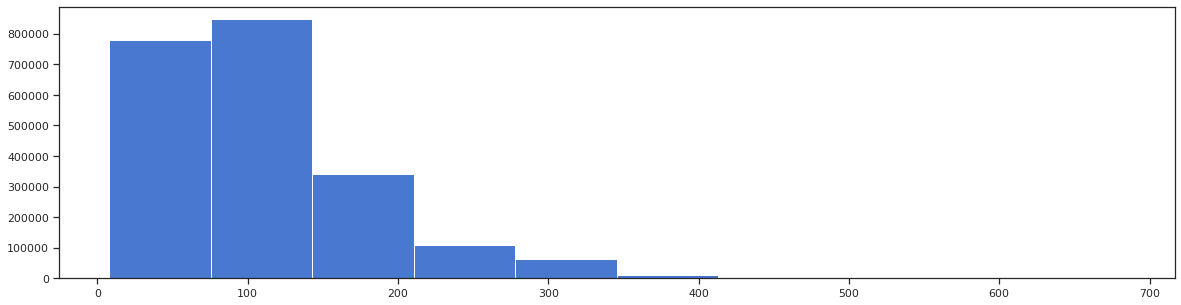

In [ ]:
plt.hist(consolidatedSelectedColumns['AIR_TIME'])
plt.show()

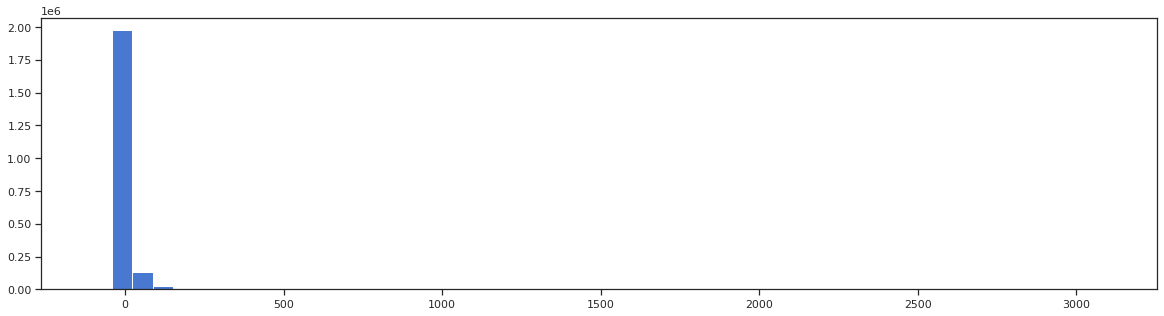

In [ ]:
plt.hist(consolidatedSelectedColumns['DEP_DELAY'],bins=50)
plt.show()

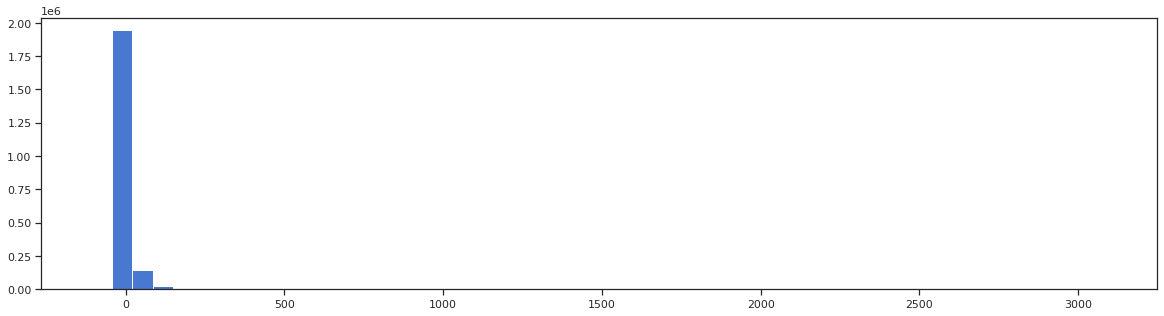

In [ ]:
plt.hist(consolidatedSelectedColumns['ARR_DELAY'],bins=50)
plt.show()

In [ ]:
#lowerbound=  (consolidatedSelectedColumns['DISTANCE'].mean()) - (3*consolidatedSelectedColumns['DISTANCE'].std())
#lowerbound

In [ ]:
consolidatedSelectedColumns[consolidatedSelectedColumns['DISTANCE']<0].groupby('DEST_CITY_NAME').count()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,MKT_UNIQUE_CARRIER,IATA_mkt_carriercode,MKT_CARRIER_FL_NUM,OP_UNIQUE_CARRIER,IATA_op_carriercode,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_WAC,DEST_AIRPORT_ID,DEST,DEST_WAC,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,TAXI_OUT,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,TAXI_IN,CANCELLATION_CODE,AIR_TIME,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
DEST_CITY_NAME,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [ ]:
consolidatedSelectedColumns[consolidatedSelectedColumns['AIR_TIME']<0].groupby('DEST_CITY_NAME').count()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,MKT_UNIQUE_CARRIER,IATA_mkt_carriercode,MKT_CARRIER_FL_NUM,OP_UNIQUE_CARRIER,IATA_op_carriercode,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_WAC,DEST_AIRPORT_ID,DEST,DEST_WAC,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,TAXI_OUT,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,TAXI_IN,CANCELLATION_CODE,AIR_TIME,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
DEST_CITY_NAME,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


So there are no negative outliers in distance and airtime

###**OUTLIERS ON DISTANCE**


**Lets see distance above 5000+ miles origin and departure to analyse outiler in distance**

* "1","Less Than 250 Miles"
* "2","250-499 Miles"
* "3","500-749 Miles"
* "4","750-999 Miles"
* "5","1000-1249 Miles"
* "6","1250-1499 Miles"
* "7","1500-1749 Miles"
* "8","1750-1999 Miles"
* "9","2000-2249 Miles"
* "10","2250-2499 Miles"
* "11","2500 Miles and Greater"

In [ ]:
distancegrt5000=consolidatedSelectedColumns[['DISTANCE','ORIGIN_CITY_NAME','DEST_CITY_NAME']][consolidatedSelectedColumns['DISTANCE']>5000].sort_values(['DISTANCE'],ascending=False)
distancegrt5000

,DISTANCE,ORIGIN_CITY_NAME,DEST_CITY_NAME
504146,5812.0,"San Francisco, CA","Guam, TT"
498222,5812.0,"Guam, TT","San Francisco, CA"
490350,5812.0,"Guam, TT","San Francisco, CA"
492330,5812.0,"Guam, TT","San Francisco, CA"
492331,5812.0,"San Francisco, CA","Guam, TT"
...,...,...,...
68085,5095.0,"Boston, MA","Honolulu, HI"
68084,5095.0,"Boston, MA","Honolulu, HI"
138464,5095.0,"Honolulu, HI","Boston, MA"
138463,5095.0,"Honolulu, HI","Boston, MA"


here we can see the extreme outliers of 5000+ miles travel is from        **1. Guam, TT to	San Francisco, CA**,  **2. Boston, MA to	Honolulu, HI** and vise versa

###**OUTLIERS ON AIR TIME**

In [ ]:
airtimegrt300=consolidatedSelectedColumns[['AIR_TIME','ORIGIN_CITY_NAME','DEST_CITY_NAME']][consolidatedSelectedColumns['AIR_TIME']>300].sort_values(['AIR_TIME'],ascending=False)
airtimegrt300

,AIR_TIME,ORIGIN_CITY_NAME,DEST_CITY_NAME
68084,683.0,"Boston, MA","Honolulu, HI"
138452,681.0,"Boston, MA","Honolulu, HI"
138451,673.0,"Boston, MA","Honolulu, HI"
504146,673.0,"San Francisco, CA","Guam, TT"
138353,670.0,"New York, NY","Honolulu, HI"
...,...,...,...
319423,301.0,"San Jose, CA","Kona, HI"
386655,301.0,"San Diego, CA","Boston, MA"
209979,301.0,"Kahului, HI","Portland, OR"
209958,301.0,"Portland, OR","Kahului, HI"


here we can see the extreme outliers of Airtime travel is same as Distance(1. Guam, TT to San Francisco, CA, 2. Boston, MA to Honolulu, HI and vise versa)

From this we can confirm increase in distance increase in airtime so outliers are valid

## CORRELATION PLOTS

**Departure delay vs Arrival delay**

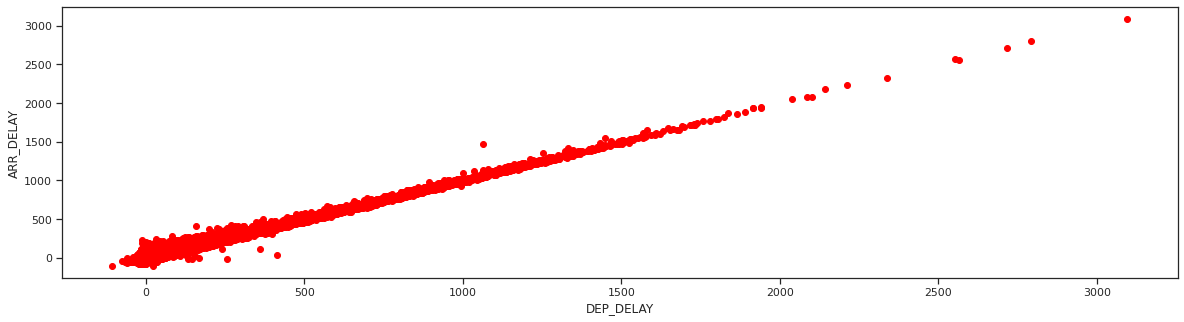

In [ ]:
ax=plt.subplot()
ax.scatter(consolidatedSelectedColumns['DEP_DELAY'],consolidatedSelectedColumns['ARR_DELAY'],c='red')
ax.set_xlabel("DEP_DELAY")
ax.set_ylabel("ARR_DELAY")
plt.show()

**Distance vs Air Time**

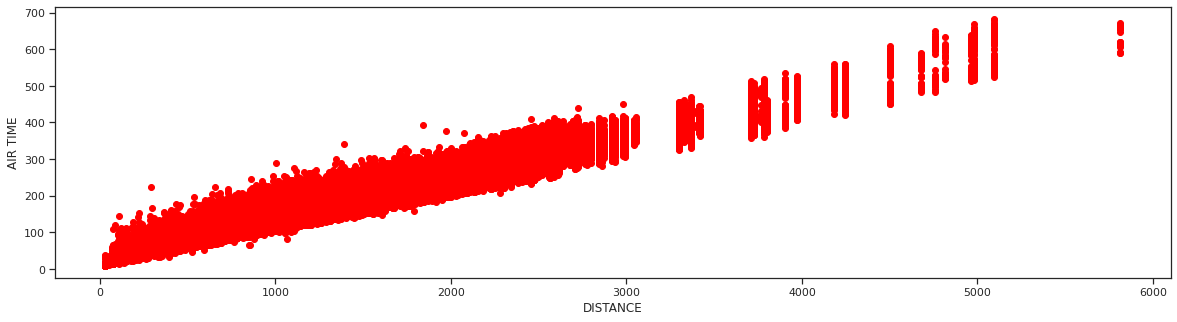

In [ ]:
ax=plt.subplot()
ax.scatter(consolidatedSelectedColumns['DISTANCE'],consolidatedSelectedColumns['AIR_TIME'],c='red')
ax.set_xlabel("DISTANCE")
ax.set_ylabel("AIR TIME")
plt.show()

# **ANALYSIS ON DELAYS**

Analysis on fields ('DEP_DELAY','DEP_DELAY_NEW' ,'DEP_DEL15','DEP_DELAY_GROUP' ,'ARR_DELAY' ,'ARR_DELAY_NEW','ARR_DEL15','ARR_DELAY_GROUP')

DEP_DELAY | ARR_DELAY
* (scheduled CRS-Actual dep)
* -ve - early, +ve - delayed

DEP_DELAY_NEW | ARR_DELAY_NEW
  * '0' -early departure
  * +ve - late departure

DEP_DEL15 | ARR_DEL15
  * 15 Minutes or More - 1
  * < 15 mins - 0

  DELAY GROUPS
  * "-2","Delay < -15 minutes"
  * "-1","Delay between -15 and -1 minutes"
  * "0","Delay between 0 and 14 minutes"
  * "1","Delay between 15 to 29 minutes"
  * "2","Delay between 30 to 44 minutes"
  * "3","Delay between 45 to 59 minutes"
  * "4","Delay between 60 to 74 minutes"
  * "5","Delay between 75 to 89 minutes"
  * "6","Delay between 90 to 104 minutes"
  * "7","Delay between 105 to 119 minutes"
  * "8","Delay between 120 to 134 minutes"
  * "9","Delay between 135 to 149 minutes"
  * "10","Delay between 150 to 164 minutes"
  * "11","Delay between 165 to 179 minutes"
  * "12","Delay >= 180 minutes"



## ORIGIN VS DEPARTURE DELAY ANALYSIS

In [ ]:
#Checking Departure delay columns unique value counts
print('DEP_DELAY \n',consolidatedSelectedColumns['DEP_DELAY'].value_counts())
print('DEP_DELAY_NEW \n',consolidatedSelectedColumns['DEP_DELAY_NEW'].value_counts())
print('DEP_DEL15 \n',consolidatedSelectedColumns['DEP_DEL15'].value_counts())
print('DEP_DELAY_GROUP \n',consolidatedSelectedColumns['DEP_DELAY_GROUP'].value_counts())

DEP_DELAY 
 -5.0       216082
-4.0       191021
-3.0       173351
-6.0       165987
-2.0       147965
            ...  
 1370.0         1
 882.0          1
 890.0          1
 1366.0         1
 1329.0         1
Name: DEP_DELAY, Length: 1367, dtype: int64
DEP_DELAY_NEW 
 0.0       1644620
1.0         39672
2.0         30971
3.0         26960
4.0         24139
           ...   
1465.0          1
1031.0          1
1464.0          1
731.0           1
1273.0          1
Name: DEP_DELAY_NEW, Length: 1312, dtype: int64
DEP_DEL15 
 0.0    1914734
1.0     236562
Name: DEP_DEL15, dtype: int64
DEP_DELAY_GROUP 
 -1.0     1529861
 0.0      368473
 1.0       92391
 2.0       43105
 3.0       25646
 4.0       16955
-2.0       16400
 12.0      15529
 5.0       11915
 6.0        8864
 7.0        6764
 8.0        5249
 9.0        4104
 10.0       3384
 11.0       2656
Name: DEP_DELAY_GROUP, dtype: int64


ORIGIN code Vs Departure Delays >15 mins - top 20 Cities

In [ ]:
#Deptdelaygreater15org=consolidatedSelectedColumns[consolidatedSelectedColumns['DEP_DEL15']==1].groupby(['ORIGIN']).count().sort_values(['DEP_DEL15'],ascending=True).reset_index()
#Deptdelaygreater15org[['DEP_DEL15','ORIGIN']].groupby(['DEP_DEL15','ORIGIN']).count().sort_values(['DEP_DEL15'],ascending=False)[:20].reset_index()

count of Departure delay >15 mins from Origin City - top 20 cities

In [ ]:
#Deptdelaygreater15orgcity=consolidatedSelectedColumns[consolidatedSelectedColumns['DEP_DEL15']==1].groupby(['ORIGIN_CITY_NAME']).count().sort_values(['DEP_DEL15'],ascending=True).reset_index()
Deptdelaygreater15orgcity=consolidatedSelectedColumns[['DEP_DEL15','ORIGIN_CITY_NAME']][consolidatedSelectedColumns['DEP_DEL15']==1].groupby(['ORIGIN_CITY_NAME']).count().sort_values(['DEP_DEL15'],ascending=False)[:20].reset_index()
Deptdelaygreater15orgcity


,ORIGIN_CITY_NAME,DEP_DEL15
0,"Dallas/Fort Worth, TX",16655
1,"Denver, CO",14098
2,"Atlanta, GA",12560
3,"Chicago, IL",12105
4,"Houston, TX",9425
5,"Charlotte, NC",7426
6,"Orlando, FL",7289
7,"Phoenix, AZ",6981
8,"Las Vegas, NV",5641
9,"Seattle, WA",5410


In [ ]:
fig = px.bar(Deptdelaygreater15orgcity, x="ORIGIN_CITY_NAME", y="DEP_DEL15", color="ORIGIN_CITY_NAME",hover_name='DEP_DEL15',color_continuous_scale=30)
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

ORIGIN_CITY_NAME Greater than 180 mins count

In [ ]:
Deptdelaygreater180org=consolidatedSelectedColumns[['DEP_DELAY_GROUP','ORIGIN_CITY_NAME']][consolidatedSelectedColumns['DEP_DELAY_GROUP']>=12].groupby(['ORIGIN_CITY_NAME']).count().sort_values(['DEP_DELAY_GROUP'],ascending=False)[:20].reset_index()
Deptdelaygreater180org
#[['DEP_DELAY_GROUP','ORIGIN_CITY_NAME']].groupby(['DEP_DELAY_GROUP','ORIGIN_CITY_NAME']).count().sort_values(['DEP_DELAY_GROUP'],ascending=False)[:20].reset_index()

,ORIGIN_CITY_NAME,DEP_DELAY_GROUP
0,"Dallas/Fort Worth, TX",1037
1,"Chicago, IL",603
2,"Houston, TX",593
3,"Denver, CO",573
4,"Atlanta, GA",483
5,"Orlando, FL",374
6,"New York, NY",362
7,"Charlotte, NC",330
8,"Fort Lauderdale, FL",322
9,"Washington, DC",316


**MONTH VS DEPARTURE DELAYS >15 mins**

---



In [ ]:
Deptdelaygreater15month=consolidatedSelectedColumns[consolidatedSelectedColumns['DEP_DEL15']==1].groupby('MONTH').count().reset_index()
#Deptdelaygreater15month
Deptdelaygreater15orgcitymonth=Deptdelaygreater15month[['MONTH','DEP_DEL15']].groupby(['MONTH','DEP_DEL15',]).count().sort_values(['DEP_DEL15'],ascending=False)[:20].reset_index()
Deptdelaygreater15orgcitymonth
#Deptdelaygreater15month[['DAY_OF_WEEK','DEL15']].groupby('DAY_OF_WEEK').agg(['mean','count'])

,MONTH,DEP_DEL15
0,5,69853
1,4,49712
2,3,46116
3,2,38993
4,1,31888


May month number of flight delays are high compare to others 

**WEEK DAYS Vs DEPARTURE DELAY**

* "1","Monday"
* "2","Tuesday"
* "3","Wednesday"
* "4","Thursday"
* "5","Friday"
* "6","Saturday"
* "7","Sunday"
* "9","Unknown"

In [ ]:
consolidatedSelectedColumns[['DAY_OF_WEEK','DEP_DEL15']][consolidatedSelectedColumns['DEP_DEL15']==1].groupby('DAY_OF_WEEK').count().sort_values(['DEP_DEL15'],ascending=False)[:20].reset_index()
#Deptdelaygreater15orgcityweek=Deptdelaygreater15Week[['DAY_OF_WEEK','DEP_DEL15']].groupby(['DAY_OF_WEEK','DEP_DEL15']).count().sort_values(['DEP_DEL15'],ascending=False)[:20].reset_index()

,DAY_OF_WEEK,DEP_DEL15
0,7,43445
1,1,37873
2,5,37752
3,6,34135
4,4,33984
5,2,24736
6,3,24637


Sunday is having Large number of Departure Delays from Origin city

## DESTINATION VS ARRIVAL DELAY ANALYSIS

In [ ]:
print('ARR_DELAY \n',consolidatedSelectedColumns['ARR_DELAY'].value_counts())
print('ARR_DELAY_NEW \n',consolidatedSelectedColumns['ARR_DELAY_NEW'].value_counts())
print('ARR_DELAY15 \n',consolidatedSelectedColumns['ARR_DEL15'].value_counts())
print('ARR_DELAY_GROUP \n',consolidatedSelectedColumns['ARR_DELAY_GROUP'].value_counts())

ARR_DELAY 
 -12.0      68170
-13.0      68102
-14.0      67912
-11.0      67742
-15.0      67102
           ...  
 1164.0        1
 1166.0        1
 1173.0        1
 1174.0        1
 1335.0        1
Name: ARR_DELAY, Length: 1408, dtype: int64
ARR_DELAY_NEW 
 0.0       1612770
1.0         33479
2.0         30700
3.0         28372
4.0         26031
           ...   
1185.0          1
711.0           1
1186.0          1
1187.0          1
1267.0          1
Name: ARR_DELAY_NEW, Length: 1321, dtype: int64
ARR_DELAY15 
 0.0    1900120
1.0     251176
Name: ARR_DEL15, dtype: int64
ARR_DELAY_GROUP 
 -1.0     876678
-2.0     698249
 0.0     325193
 1.0     104631
 2.0      46554
 3.0      25959
 4.0      16765
 12.0     15092
 5.0      11849
 6.0       8586
 7.0       6542
 8.0       5213
 9.0       4181
 10.0      3201
 11.0      2603
Name: ARR_DELAY_GROUP, dtype: int64


In [ ]:
#Arrdelaygreater15org=consolidatedSelectedColumns[consolidatedSelectedColumns['ARR_DEL15']==1].groupby(['DEST']).count().sort_values(['ARR_DEL15'],ascending=True).reset_index()
#consolidatedSelectedColumns[['ARR_DEL15','DEST']][consolidatedSelectedColumns['ARR_DEL15']==1].groupby(['DEST']).count().sort_values(['ARR_DEL15'],ascending=False)[:20].reset_index()

**DESTINATION CITY NAME Vs ARRIVAL DELAYS >15 mins - top 20 cities**

In [ ]:
Arrdelaygreater15orgcity=consolidatedSelectedColumns[['ARR_DEL15','DEST_CITY_NAME']][consolidatedSelectedColumns['ARR_DEL15']==1].groupby(['DEST_CITY_NAME']).count().sort_values(['ARR_DEL15'],ascending=False)[:20].reset_index()
Arrdelaygreater15orgcity

,DEST_CITY_NAME,ARR_DEL15
0,"Dallas/Fort Worth, TX",19079
1,"Denver, CO",12769
2,"Chicago, IL",11708
3,"Atlanta, GA",10269
4,"Houston, TX",8833
5,"Charlotte, NC",8356
6,"Orlando, FL",7419
7,"Seattle, WA",6269
8,"Phoenix, AZ",6233
9,"Los Angeles, CA",5679


In [ ]:
fig = px.bar(Arrdelaygreater15orgcity, x="DEST_CITY_NAME", y="ARR_DEL15", color="DEST_CITY_NAME",hover_name='ARR_DEL15',color_continuous_scale=30)
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

**MONTH Vs ARRIVAL DELAYS TO DESTINATION >15 mins**

In [ ]:
Arrdelaygreater15month=consolidatedSelectedColumns[consolidatedSelectedColumns['ARR_DEL15']==1].groupby('MONTH').count().reset_index()
Arrdelaygreater15orgcitymonth=Arrdelaygreater15month[['MONTH','ARR_DEL15']].groupby(['MONTH','ARR_DEL15']).count().sort_values(['ARR_DEL15'],ascending=False)[:20].reset_index()
Arrdelaygreater15orgcitymonth

,MONTH,ARR_DEL15
0,5,68339
1,4,50043
2,2,48833
3,3,47012
4,1,36949


Like Departure May month is having huge Arrival Delays. 

**WEEK DAYS vs ARRIVAL DELAY**

In [ ]:
#Arrdelaygreater15Week=consolidatedSelectedColumns[consolidatedSelectedColumns['ARR_DEL15']==1].groupby('DAY_OF_WEEK').count().reset_index()
Arrdelaygreater15orgcityweek=consolidatedSelectedColumns[['DAY_OF_WEEK','ARR_DEL15']][consolidatedSelectedColumns['ARR_DEL15']==1].groupby(['DAY_OF_WEEK']).count().sort_values(['ARR_DEL15'],ascending=False)[:20].reset_index()
Arrdelaygreater15orgcityweek

,DAY_OF_WEEK,ARR_DEL15
0,7,45538
1,1,40443
2,5,39965
3,4,37170
4,6,35261
5,3,26602
6,2,26197


Like Departure Sunday is having high arrival Delays 
* Lets assume that because of Departure delay Arrival delays are happening. 
* Lets confirm by further analysis by comparing Departure and Arrival

# DELAY CAUSES  ANALYSIS

* CarrierDelay	
* WeatherDelay			 
* NASDelay- National Air System Delay, 		 
* SecurityDelay	 
* LateAircraftDelay

###General Cause Analysis

Month wise

In [ ]:
Causes = consolidatedSelectedColumns.filter(['MONTH','CARRIER_DELAY','WEATHER_DELAY','NAS_DELAY','SECURITY_DELAY','LATE_AIRCRAFT_DELAY'], axis=1)
Causes = Causes.groupby('MONTH')['CARRIER_DELAY','WEATHER_DELAY','NAS_DELAY','SECURITY_DELAY','LATE_AIRCRAFT_DELAY'].mean().sort_values(['MONTH'],ascending=True).reset_index()
Causes


,MONTH,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,1,26.431270,6.778857,16.811199,0.210371,15.672305
1,2,24.720640,10.978027,14.982389,0.131264,15.544980
2,3,27.613473,3.806450,11.776563,0.246113,17.671311
3,4,26.861040,4.386787,12.941990,0.661511,19.583478
4,5,26.034124,5.604545,12.361697,0.219318,22.160435


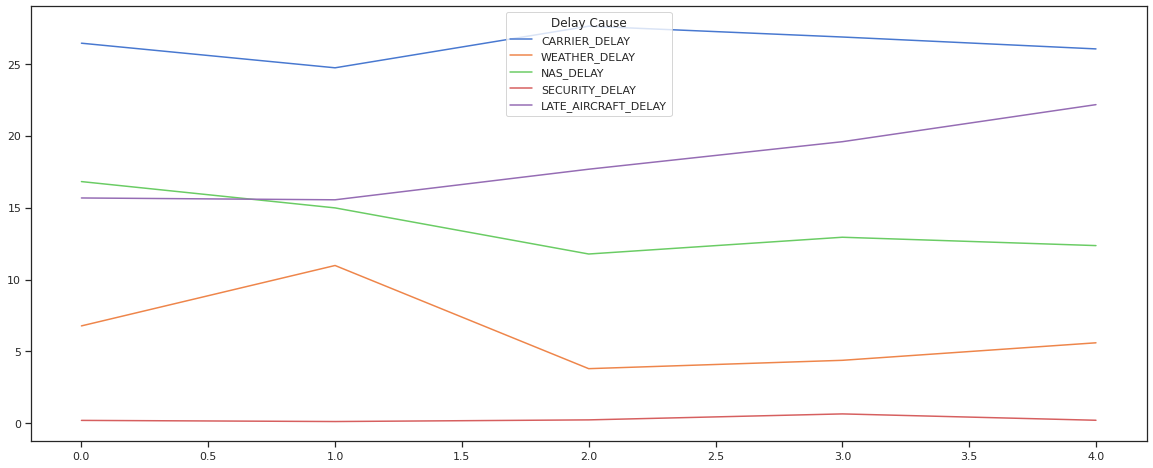

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(Causes.CARRIER_DELAY,label='CARRIER_DELAY')
plt.plot(Causes.WEATHER_DELAY,label='WEATHER_DELAY')
plt.plot(Causes.NAS_DELAY,label='NAS_DELAY')
plt.plot(Causes.SECURITY_DELAY,label='SECURITY_DELAY')
plt.plot(Causes.LATE_AIRCRAFT_DELAY,label='LATE_AIRCRAFT_DELAY')
#plt.plot(Causes)
plt.legend(loc='upper center',title="Delay Cause")
plt.show()

On the whole Carrier Delay, Lateaircraft delay and NAS delay are High. 


### **DELAY CAUSE PERCENTAGE**

In [ ]:
depdelaysum=consolidatedSelectedColumns['DEP_DELAY'][consolidatedSelectedColumns['DEP_DELAY']>=15].count()
arrdelaysum=consolidatedSelectedColumns['ARR_DELAY'][consolidatedSelectedColumns['ARR_DELAY']>=1].count()
totdelay=depdelaysum+arrdelaysum
print("total delay sum is",totdelay,"mins")

total delay sum is 775088 mins


In [ ]:
depdelaysum

236562

Percentage of Carrier delay from on the whole departure+arrival delay

In [ ]:
carrierdelaysum=consolidatedSelectedColumns['CARRIER_DELAY'][consolidatedSelectedColumns['CARRIER_DELAY']>=1].sum()
percentofcarrierdelay=(carrierdelaysum/totdelay)*100
percentofcarrierdelay

852.1976859401772

Percentage of LATE_AIRCRAFT_DELAY from on the whole departure+arrival delay

In [ ]:
lateaircraftdelaysum=consolidatedSelectedColumns['LATE_AIRCRAFT_DELAY'][consolidatedSelectedColumns['LATE_AIRCRAFT_DELAY']>=1].sum()
percentoflateaircraftdelay=(lateaircraftdelaysum/totdelay)*100
percentoflateaircraftdelay

601.6565860908697

Percentage of WEATHER_DELAY from on the whole departure+arrival delay

In [ ]:
weatherdelaysum=consolidatedSelectedColumns['WEATHER_DELAY'][consolidatedSelectedColumns['WEATHER_DELAY']>=1].sum()
percentofweatherdelay=(weatherdelaysum/totdelay)*100
percentofweatherdelay

202.30528662551865

Percentage of NAS_DELAY from on the whole departure+arrival delay

In [ ]:
NASdelaysum=consolidatedSelectedColumns['NAS_DELAY'][consolidatedSelectedColumns['NAS_DELAY']>=1].sum()
percentofNASdelay=(NASdelaysum/totdelay)*100
percentofNASdelay

438.5130462605536

Percentage of SECURITY_DELAY from the whole departure delay

In [ ]:
Securitydelaysum=consolidatedSelectedColumns['SECURITY_DELAY'][consolidatedSelectedColumns['SECURITY_DELAY']>=1].sum()
percentofsecuritydelay=(Securitydelaysum/totdelay)*100
percentofsecuritydelay

9.527305286625518

* Lets do individual analysis on departure and Arrival with these causes


## **ANALYSIS ON CAUSE OF DELAY DEPARTURE FROM ORIGIN (in Minutes)**


1.Lets take top 3 delays (CARRIER DELAYARRIER_DELAY,NAS_DELAY, LATE_AIRCRAFT_DELAY) with respect to DEPARTURE



Top 20 Cities airlines **flights delayed in departure** because of **carrier delay**>60 mins

In [ ]:
Deptdelaygreater60=consolidatedSelectedColumns[consolidatedSelectedColumns['DEP_DELAY']>60]
#Deptcarrierdelaygreater60orgcity1= Deptdelaygreater60[['CARRIER_DELAY','NAS_DELAY','ORIGIN_CITY_NAME']].loc[(Deptdelaygreater60['CARRIER_DELAY']>60) | (Deptdelaygreater60['NAS_DELAY']>60)].groupby(['ORIGIN_CITY_NAME']).mean().sort_values(['CARRIER_DELAY'],ascending=False)[:20].reset_index()
Deptcarrierdelaygreater60orgcity=Deptdelaygreater60[['CARRIER_DELAY','ORIGIN_CITY_NAME']][Deptdelaygreater60['CARRIER_DELAY']>60].groupby(['ORIGIN_CITY_NAME']).mean().sort_values(['CARRIER_DELAY'],ascending=False)[:20].reset_index()
Deptcarrierdelaygreater60orgcity
#Carrierdelaygreater15=Deptdelaygreater15orgcity[['ORIGIN_CITY_NAME','MONTH','CARRIER_DELAY']].groupby(['ORIGIN_CITY_NAME','MONTH']).count().sort_values(['CARRIER_DELAY'],ascending=False)[:20].reset_index()

,ORIGIN_CITY_NAME,CARRIER_DELAY
0,"North Bend/Coos Bay, OR",732.000000
1,"Iron Mountain/Kingsfd, MI",719.000000
2,"Cedar City, UT",688.000000
3,"Hobbs, NM",687.500000
4,"Williamsport, PA",668.000000
5,"Watertown, SD",575.166667
6,"Christiansted, VI",533.500000
7,"Montrose/Delta, CO",456.588235
8,"Hattiesburg/Laurel, MS",448.600000
9,"Muskegon, MI",444.333333


Top 20 Cities airlines **flights delayed in departure** because of **NSA delay**>60 mins

In [ ]:
DeptNASdelaygreater60orgcity=Deptdelaygreater60[['NAS_DELAY','ORIGIN_CITY_NAME']][Deptdelaygreater60['NAS_DELAY']>60].groupby(['ORIGIN_CITY_NAME']).mean().sort_values(['NAS_DELAY'],ascending=False)[:20].reset_index()
DeptNASdelaygreater60orgcity

,ORIGIN_CITY_NAME,NAS_DELAY
0,"Joplin, MO",734.500000
1,"Niagara Falls, NY",394.000000
2,"Cheyenne, WY",381.500000
3,"Fort Dodge, IA",364.000000
4,"Killeen, TX",361.250000
5,"Hayden, CO",349.090909
6,"Liberal, KS",327.000000
7,"Cody, WY",321.666667
8,"Flagstaff, AZ",277.900000
9,"White Plains, NY",276.200000


Top 20 Cities airlines **flights delayed in departure** because of **LATE_AIRCRAFT_DELAY**>60 mins

In [ ]:
DeptLateairdelaygreater60orgcity=Deptdelaygreater60[['LATE_AIRCRAFT_DELAY','ORIGIN_CITY_NAME']][Deptdelaygreater60['LATE_AIRCRAFT_DELAY']>60].groupby(['ORIGIN_CITY_NAME']).mean().sort_values(['LATE_AIRCRAFT_DELAY'],ascending=False)[:20].reset_index()
DeptLateairdelaygreater60orgcity

,ORIGIN_CITY_NAME,LATE_AIRCRAFT_DELAY
0,"Devils Lake, ND",537.500000
1,"Jamestown, ND",403.700000
2,"Elmira/Corning, NY",370.111111
3,"Moab, UT",345.500000
4,"Sheridan, WY",338.000000
5,"Aguadilla, PR",330.000000
6,"Mosinee, WI",329.750000
7,"Saipan, TT",316.333333
8,"Niagara Falls, NY",290.000000
9,"Johnstown, PA",283.500000


In [ ]:
#import plotly.express as px
#fig = px.pie(Deptcarrierdelaygreater60orgcity, values='CARRIER_DELAY', names='ORIGIN_CITY_NAME',title='TOP 20 DEPARTURE CARRIER DELAY IN ORIGIN CITY AIRLINES' )
#fig.show()

## **ANALYSIS ON CAUSE OF DELAY ARRIVAL FROM DESTINATION (in Minutes)**


2.Lets take top 3 delays (CARRIER DELAYARRIER_DELAY,NAS_DELAY, LATE_AIRCRAFT_DELAY) with respect to ARRIVAL

Top 20 cities airlines Arrival delay because of Carrier delay > 60 mins

In [ ]:
Arrdelaygreater60=consolidatedSelectedColumns[consolidatedSelectedColumns['ARR_DELAY']>60]
Arrdelaygreater60
Arrcarrierdelaygreater60orgcity=Arrdelaygreater60[['CARRIER_DELAY','DEST_CITY_NAME']][Arrdelaygreater60['CARRIER_DELAY']>60].groupby(['DEST_CITY_NAME']).mean().sort_values(['CARRIER_DELAY'],ascending=False)[:20].reset_index()
Arrcarrierdelaygreater60orgcity


,DEST_CITY_NAME,CARRIER_DELAY
0,"Provo, UT",730.000000
1,"Niagara Falls, NY",643.666667
2,"Escanaba, MI",518.250000
3,"Salina, KS",509.400000
4,"Meridian, MS",456.750000
5,"Mason City, IA",446.400000
6,"Gillette, WY",428.000000
7,"Victoria, TX",426.500000
8,"Elmira/Corning, NY",419.571429
9,"Johnstown, PA",403.166667


Top 20 cities airlines Arrival delay because of NAS delay > 60 mins

In [ ]:
ArrNASdelaygreater60orgcity=Arrdelaygreater60[['NAS_DELAY','DEST_CITY_NAME']][Arrdelaygreater60['NAS_DELAY']>60].groupby(['DEST_CITY_NAME']).mean().sort_values(['NAS_DELAY'],ascending=False)[:20].reset_index()
ArrNASdelaygreater60orgcity

,DEST_CITY_NAME,NAS_DELAY
0,"Gillette, WY",776.000000
1,"Bellingham, WA",317.333333
2,"Manhattan/Ft. Riley, KS",316.500000
3,"Eugene, OR",307.750000
4,"Christiansted, VI",270.000000
5,"Oakland, CA",222.181818
6,"Provo, UT",215.750000
7,"Liberal, KS",212.000000
8,"Eagle, CO",209.550000
9,"Yuma, AZ",208.000000


top 20 cities airlines Arrival delay because of Late air craft delay > 60 mins

In [ ]:
ArrLateairdelaygreater60orgcity=Arrdelaygreater60[['LATE_AIRCRAFT_DELAY','DEST_CITY_NAME']][Arrdelaygreater60['LATE_AIRCRAFT_DELAY']>60].groupby(['DEST_CITY_NAME']).mean().sort_values(['LATE_AIRCRAFT_DELAY'],ascending=False)[:20].reset_index()
ArrLateairdelaygreater60orgcity

,DEST_CITY_NAME,LATE_AIRCRAFT_DELAY
0,"Devils Lake, ND",520.333333
1,"Jamestown, ND",497.500000
2,"Joplin, MO",291.333333
3,"Mosinee, WI",279.125000
4,"Columbia, MO",277.250000
5,"Bellingham, WA",260.285714
6,"Guam, TT",260.250000
7,"St. George, UT",247.454545
8,"Salina, KS",244.000000
9,"Gunnison, CO",228.000000


#COMPARISON OF BOTH DEPARTURE AND ARRIVAL DELAYS WITH RESPECT TO MAIN 3 CAUSES
* CARRIER_DELAY         
* NAS_DELAY             
* LATE_AIRCRAFT_DELAY 

In [ ]:
#!pip install --upgrade plotly

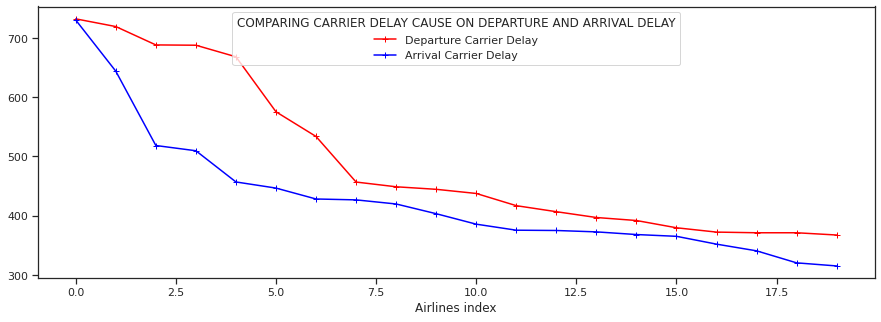

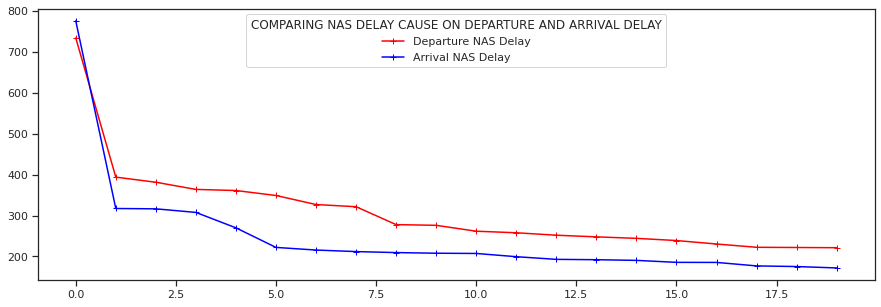

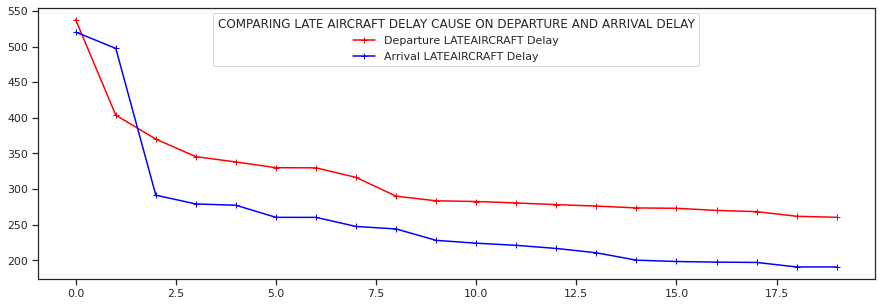

In [ ]:
#fig, axes = plt.subplots(nrows=3, ncols=2,figsize=(22,25))
#fig1=plt.figure(figsize=(15,5))
#fig1.plt
plt.figure(figsize=(15,5))
#fig=px.line(Deptcarrierdelaygreater60orgcity,x='ORIGIN_CITY_NAME',y='CARRIER_DELAY',line_group='Arrcarrierdelaygreater60orgcity.CARRIER_DELAY')
#fig.show()
plt.plot(Deptcarrierdelaygreater60orgcity.CARRIER_DELAY,label='Departure Carrier Delay',marker='+',color='red')
plt.xlabel('Airlines index')
plt.plot(Arrcarrierdelaygreater60orgcity.CARRIER_DELAY,label='Arrival Carrier Delay',marker='+',color='blue')
plt.legend(loc='upper center',title="COMPARING CARRIER DELAY CAUSE ON DEPARTURE AND ARRIVAL DELAY")
plt.show()
plt.figure(figsize=(15,5))
plt.plot(DeptNASdelaygreater60orgcity.NAS_DELAY,label='Departure NAS Delay',marker='+',color='red')
plt.plot(ArrNASdelaygreater60orgcity.NAS_DELAY,label='Arrival NAS Delay',marker='+',color='blue')
plt.legend(loc='upper center',title="COMPARING NAS DELAY CAUSE ON DEPARTURE AND ARRIVAL DELAY")
plt.show()
plt.figure(figsize=(15,5))
plt.plot(DeptLateairdelaygreater60orgcity.LATE_AIRCRAFT_DELAY,label='Departure LATEAIRCRAFT Delay',marker='+',color='red')
plt.plot(ArrLateairdelaygreater60orgcity.LATE_AIRCRAFT_DELAY,label='Arrival LATEAIRCRAFT Delay',marker='+',color='blue')
plt.legend(loc='upper center',title="COMPARING LATE AIRCRAFT DELAY CAUSE ON DEPARTURE AND ARRIVAL DELAY")
plt.show()

* From the above we can see that Both Departure delay and Arrival delay MEAN time are in same trend. But Departure is high than Arrival for all the three Cause(Carrier,NAS,Late_aircraft delays)
* From this we can infer that, eventhough Departure is delayed because of 3 delays, flights can adjust speed to catch up time and reduced Arrival delay

# DELAY STATUS COUNT ANALYSIS IN OPERATING AIRLINES

**we can create a new column by summing delays at departure and arrival for both delays based on location and date**

In [ ]:
consolidatedSelectedColumns['TOTALDELAY'] = consolidatedSelectedColumns['ARR_DELAY'] + consolidatedSelectedColumns['DEP_DELAY']

Based on Delay groups lets create new field **Delaystatus**
* 0 = early- <0
* 1 = No delay - 0 mins
* 2 = slight-1 to 10 
* 3 = mediumdelay- 11 to 44 mins
* 4 = Heavydelay- 45 to 89 mins
* 5 = VeryHeavyDelay-89 to 180 mins
* 6 = VeryveryheavyDelay- >181 mins




In [ ]:
for dataset in consolidatedSelectedColumns:
    consolidatedSelectedColumns.loc[consolidatedSelectedColumns['TOTALDELAY'] < 0, 'Delaystatus'] =0
    consolidatedSelectedColumns.loc[consolidatedSelectedColumns['TOTALDELAY'] == 0,'Delaystatus'] =1
    consolidatedSelectedColumns.loc[consolidatedSelectedColumns['TOTALDELAY'] >=1,'Delaystatus'] =2
    consolidatedSelectedColumns.loc[consolidatedSelectedColumns['TOTALDELAY'] >=11,'Delaystatus'] =3
    consolidatedSelectedColumns.loc[consolidatedSelectedColumns['TOTALDELAY'] >=46,'Delaystatus'] =4
    consolidatedSelectedColumns.loc[consolidatedSelectedColumns['TOTALDELAY'] >=90,'Delaystatus'] =5
    consolidatedSelectedColumns.loc[consolidatedSelectedColumns['TOTALDELAY'] >=181,'Delaystatus'] =6

consolidatedSelectedColumns[['TOTALDELAY','Delaystatus']].head()

,TOTALDELAY,Delaystatus
0,11.0,3.0
1,-16.0,0.0
2,-19.0,0.0
3,-23.0,0.0
4,11.0,3.0


In [ ]:
delayedstatusgroup=consolidatedSelectedColumns[['IATA_op_carriercode','Delaystatus']].groupby(['Delaystatus']).count().sort_values(('Delaystatus'), ascending=False).reset_index()
delayedstatusgroup

,Delaystatus,IATA_op_carriercode
0,6.0,44680
1,5.0,51512
2,4.0,71805
3,3.0,195996
4,2.0,166756
5,1.0,24073
6,0.0,1596474


In [ ]:
import plotly.express as px
fig = px.bar(delayedstatusgroup, x='Delaystatus',y='IATA_op_carriercode',color='Delaystatus',title='DELAY STATUS OF OPERATING CARRIER AIRLINES')
fig.show()

From the above we can infer that (excluding early -0) delay status 2,3(slight and medium delay are high- 1 to 45 mins) COUNT in operating airlines carrier  

# VERY HIGH DELAY CAUSE IN INDIVIDUAL AIRLINES(top3 mean time) ANALYSIS IN OPERATING CARRIER AIRLINES

**MEAN TIME DEPARTURE DELAY > 180  AIRLINES(IATA_OP_carriercode)**

In [ ]:
depdelaytop3=consolidatedSelectedColumns[consolidatedSelectedColumns['DEP_DELAY']>=180]
def get_stats(group):
    return {'min': group.min(), 'max': group.max(),
            'count': group.count(), 'mean': group.mean()}
global_stats = depdelaytop3['DEP_DELAY'].groupby(depdelaytop3['IATA_op_carriercode']).apply(get_stats).unstack()
global_stats = global_stats.sort_values('mean',ascending=False)
global_stats

,min,max,count,mean
IATA_op_carriercode,,,,
HA,183.0,1757.0,28.0,538.535714
AA,180.0,3095.0,1998.0,414.550050
OO,180.0,1823.0,2858.0,387.911826
PT,180.0,1733.0,335.0,375.477612
G4,180.0,1942.0,607.0,374.378913
DL,180.0,1234.0,1589.0,367.220894
C5,180.0,1365.0,474.0,360.531646
9E,180.0,1915.0,536.0,357.259328
YV,180.0,1630.0,790.0,350.624051


In [ ]:
#delayedstatusgroup1=consolidatedSelectedColumns[['IATA_op_carriercode','DEP_DELAY']][consolidatedSelectedColumns['DEP_DELAY']>=180].groupby(['IATA_op_carriercode']).mean().sort_values(('DEP_DELAY'), ascending=False).reset_index()


## Analyics on top 3 IATA_op_carriercode airlines delay cause
1. HA	538.535714
2. AA	414.550050
3. OO	387.911826


###**Delay Cause in HA--Hawaiian Airlines Inc**


### **DEPARTURE**

In [ ]:
'''iataHA=consolidatedSelectedColumns[consolidatedSelectedColumns['IATA_op_carriercode']=='HA']
DEP_DELAYgrt180HA=iataHA[iataHA['DEP_DELAY'] >180]
def get_stats(group):
    return {'min': group.min(), 'max': group.max(),
            'count': group.count(), 'mean': group.mean()}
global_stats = DEP_DELAYgrt180HA['CARRIER_DELAY'].groupby(DEP_DELAYgrt180HA['IATA_op_carriercode']).apply(get_stats).unstack()
#global_stats = global_stats.sort_values('count')
global_stats'''



"iataHA=consolidatedSelectedColumns[consolidatedSelectedColumns['IATA_op_carriercode']=='HA']\nDEP_DELAYgrt180HA=iataHA[iataHA['DEP_DELAY'] >180]\ndef get_stats(group):\n    return {'min': group.min(), 'max': group.max(),\n            'count': group.count(), 'mean': group.mean()}\nglobal_stats = DEP_DELAYgrt180HA['CARRIER_DELAY'].groupby(DEP_DELAYgrt180HA['IATA_op_carriercode']).apply(get_stats).unstack()\n#global_stats = global_stats.sort_values('count')\nglobal_stats"

In [ ]:
'''iataHA=consolidatedSelectedColumns[consolidatedSelectedColumns['IATA_op_carriercode']=='HA']
DEP_DELAYgrt180HA=iataHA[iataHA['DEP_DELAY'] >180]
deptcarrierdelaygreat180HA=DEP_DELAYgrt180HA[['CARRIER_DELAY','IATA_op_carriercode']][DEP_DELAYgrt180HA['CARRIER_DELAY']>180].groupby(['IATA_op_carriercode']).mean().sort_values(['CARRIER_DELAY'],ascending=False).reset_index()
deptNASdelaygreat180HA=DEP_DELAYgrt180HA[['NAS_DELAY','IATA_op_carriercode']][DEP_DELAYgrt180HA['NAS_DELAY']>180].groupby(['IATA_op_carriercode']).mean().sort_values(['NAS_DELAY'],ascending=False).reset_index()
deptweatherdelaygreat180HA=DEP_DELAYgrt180HA[['WEATHER_DELAY','IATA_op_carriercode']][DEP_DELAYgrt180HA['WEATHER_DELAY']>180].groupby(['IATA_op_carriercode']).mean().sort_values(['WEATHER_DELAY'],ascending=False).reset_index()
deptsecuritydelaygreat180HA=DEP_DELAYgrt180HA[['SECURITY_DELAY','IATA_op_carriercode']][DEP_DELAYgrt180HA['SECURITY_DELAY']>180].groupby(['IATA_op_carriercode']).mean().sort_values(['SECURITY_DELAY'],ascending=False).reset_index()
deptlateairdelaygreat180HA=DEP_DELAYgrt180HA[['LATE_AIRCRAFT_DELAY','IATA_op_carriercode']][DEP_DELAYgrt180HA['LATE_AIRCRAFT_DELAY']>180].groupby(['IATA_op_carriercode']).mean().sort_values(['LATE_AIRCRAFT_DELAY'],ascending=False).reset_index()
'''

"iataHA=consolidatedSelectedColumns[consolidatedSelectedColumns['IATA_op_carriercode']=='HA']\nDEP_DELAYgrt180HA=iataHA[iataHA['DEP_DELAY'] >180]\ndeptcarrierdelaygreat180HA=DEP_DELAYgrt180HA[['CARRIER_DELAY','IATA_op_carriercode']][DEP_DELAYgrt180HA['CARRIER_DELAY']>180].groupby(['IATA_op_carriercode']).mean().sort_values(['CARRIER_DELAY'],ascending=False).reset_index()\ndeptNASdelaygreat180HA=DEP_DELAYgrt180HA[['NAS_DELAY','IATA_op_carriercode']][DEP_DELAYgrt180HA['NAS_DELAY']>180].groupby(['IATA_op_carriercode']).mean().sort_values(['NAS_DELAY'],ascending=False).reset_index()\ndeptweatherdelaygreat180HA=DEP_DELAYgrt180HA[['WEATHER_DELAY','IATA_op_carriercode']][DEP_DELAYgrt180HA['WEATHER_DELAY']>180].groupby(['IATA_op_carriercode']).mean().sort_values(['WEATHER_DELAY'],ascending=False).reset_index()\ndeptsecuritydelaygreat180HA=DEP_DELAYgrt180HA[['SECURITY_DELAY','IATA_op_carriercode']][DEP_DELAYgrt180HA['SECURITY_DELAY']>180].groupby(['IATA_op_carriercode']).mean().sort_values(['SE

In [ ]:
iataHA=consolidatedSelectedColumns[consolidatedSelectedColumns['IATA_op_carriercode']=='HA']
DEP_DELAYgrt180HA=iataHA[iataHA['DEP_DELAY'] >180]
deptcarrierdelaygreat180HAmean=DEP_DELAYgrt180HA['CARRIER_DELAY'][DEP_DELAYgrt180HA['CARRIER_DELAY']>180].mean()
deptNASdelaygreat180HAmean=DEP_DELAYgrt180HA['NAS_DELAY'][DEP_DELAYgrt180HA['NAS_DELAY']>180].mean()
deptweatherdelaygreat180HAmean=DEP_DELAYgrt180HA['WEATHER_DELAY'][DEP_DELAYgrt180HA['WEATHER_DELAY']>180].mean()
deptsecuritydelaygreat180HAmean=DEP_DELAYgrt180HA['SECURITY_DELAY'][DEP_DELAYgrt180HA['SECURITY_DELAY']>180].mean()
deptlateairdelaygreat180HAmean=DEP_DELAYgrt180HA['LATE_AIRCRAFT_DELAY'][DEP_DELAYgrt180HA['LATE_AIRCRAFT_DELAY']>180].mean()
#count
deptcarrierdelaygreat180HAcount=DEP_DELAYgrt180HA['CARRIER_DELAY'][DEP_DELAYgrt180HA['CARRIER_DELAY']>180].count()
deptNASdelaygreat180HAcount=DEP_DELAYgrt180HA['NAS_DELAY'][DEP_DELAYgrt180HA['NAS_DELAY']>180].count()
deptweatherdelaygreat180HAcount=DEP_DELAYgrt180HA['WEATHER_DELAY'][DEP_DELAYgrt180HA['WEATHER_DELAY']>180].count()
deptsecuritydelaygreat180HAcount=DEP_DELAYgrt180HA['SECURITY_DELAY'][DEP_DELAYgrt180HA['SECURITY_DELAY']>180].count()
deptlateairdelaygreat180HAcount=DEP_DELAYgrt180HA['LATE_AIRCRAFT_DELAY'][DEP_DELAYgrt180HA['LATE_AIRCRAFT_DELAY']>180].count()

In [ ]:
HA_DELAYdf = pd.DataFrame({
    'Delays': ['CARRIER_DELAY', 'NAS_DELAY', 'WEATHER_DELAY', 'SECURITY_DELAY', 
              'LATE_AIRCRAFT_DELAY'],
    
    'mean': [deptcarrierdelaygreat180HAmean, deptNASdelaygreat180HAmean,deptweatherdelaygreat180HAmean, deptsecuritydelaygreat180HAmean,
              deptlateairdelaygreat180HAmean],
    'count': [deptcarrierdelaygreat180HAcount, deptNASdelaygreat180HAcount,deptweatherdelaygreat180HAcount, deptsecuritydelaygreat180HAcount,
              deptlateairdelaygreat180HAcount]
                    })
HA_DELAYdf

,Delays,mean,count
0,CARRIER_DELAY,490.958333,24
1,NAS_DELAY,NaN,0
2,WEATHER_DELAY,972.500000,2
3,SECURITY_DELAY,NaN,0
4,LATE_AIRCRAFT_DELAY,330.000000,2


From the above-**"HA","Hawaiian Airlines Inc.** the heavy delay >180 mins caused because of WEATHER delay average of 972 mins , then CARRIER and LATE AIR CRAFT delay, but count of carrier delay is higher

####DAY_OF_WEEK DEPARTURE delay analysis on HA airlines


In [ ]:
deptcarrierdelaygreat180HAweek=DEP_DELAYgrt180HA[['CARRIER_DELAY','DAY_OF_WEEK']][DEP_DELAYgrt180HA['CARRIER_DELAY']>180].groupby(['DAY_OF_WEEK']).mean().sort_values(['CARRIER_DELAY'],ascending=False).reset_index()
deptNASdelaygreat180HAweek=DEP_DELAYgrt180HA[['NAS_DELAY','DAY_OF_WEEK']][DEP_DELAYgrt180HA['NAS_DELAY']>180].groupby(['DAY_OF_WEEK']).mean().sort_values(['NAS_DELAY'],ascending=False).reset_index()
deptweatherdelaygreat180HAweek=DEP_DELAYgrt180HA[['WEATHER_DELAY','DAY_OF_WEEK']][DEP_DELAYgrt180HA['WEATHER_DELAY']>180].groupby(['DAY_OF_WEEK']).mean().sort_values(['WEATHER_DELAY'],ascending=False).reset_index()
deptsecuritydelaygreat180HAweek=DEP_DELAYgrt180HA[['SECURITY_DELAY','DAY_OF_WEEK']][DEP_DELAYgrt180HA['SECURITY_DELAY']>180].groupby(['DAY_OF_WEEK']).mean().sort_values(['SECURITY_DELAY'],ascending=False).reset_index()
deptlateairdelaygreat180HAweek=DEP_DELAYgrt180HA[['LATE_AIRCRAFT_DELAY','DAY_OF_WEEK']][DEP_DELAYgrt180HA['LATE_AIRCRAFT_DELAY']>180].groupby(['DAY_OF_WEEK']).mean().sort_values(['LATE_AIRCRAFT_DELAY'],ascending=False).reset_index()
print(deptcarrierdelaygreat180HAweek)
print(deptweatherdelaygreat180HAweek)
print(deptlateairdelaygreat180HAweek)
#print(deptNASdelaygreat180HAweek)
#print(deptsecuritydelaygreat180HAweek)

   DAY_OF_WEEK  CARRIER_DELAY
0            6     626.000000
1            4     607.625000
2            3     589.000000
3            1     305.000000
4            5     295.666667
5            7     285.333333
6            2     224.000000
   DAY_OF_WEEK  WEATHER_DELAY
0            1         1740.0
1            6          205.0
   DAY_OF_WEEK  LATE_AIRCRAFT_DELAY
0            4                335.0
1            6                325.0


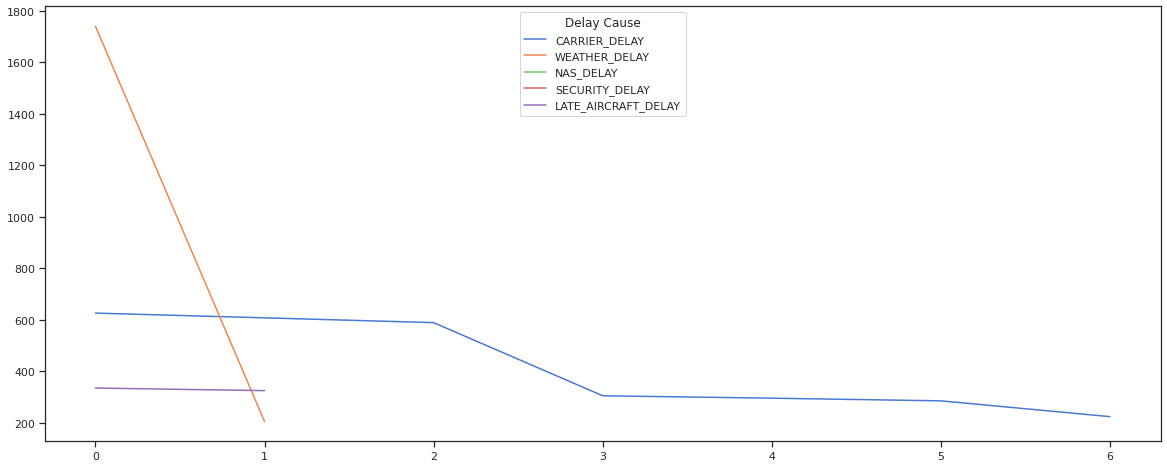

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(deptcarrierdelaygreat180HAweek.CARRIER_DELAY,label='CARRIER_DELAY')
plt.plot(deptweatherdelaygreat180HAweek.WEATHER_DELAY,label='WEATHER_DELAY')
plt.plot(deptNASdelaygreat180HAweek.NAS_DELAY,label='NAS_DELAY')
plt.plot(deptsecuritydelaygreat180HAweek.SECURITY_DELAY,label='SECURITY_DELAY')
plt.plot(deptlateairdelaygreat180HAweek.LATE_AIRCRAFT_DELAY,label='LATE_AIRCRAFT_DELAY')
#plt.plot(Causes)
plt.legend(loc='upper center',title="Delay Cause")
plt.show()

In [ ]:
'''#CArrier delay in HA
deptcarrierdelaygreat180HA=DEP_DELAYgrt180HA[['CARRIER_DELAY','MONTH','IATA_op_carriercode']][DEP_DELAYgrt180HA['CARRIER_DELAY']>180].groupby(['MONTH']).count().sort_values(['CARRIER_DELAY'],ascending=False).reset_index()
deptcarrierdelaygreat180HA
#NAS DELAY in HA
deptNASdelaygreat180HA=DEP_DELAYgrt180HA[['NAS_DELAY','MONTH','IATA_op_carriercode']][DEP_DELAYgrt180HA['NAS_DELAY']>180].groupby(['MONTH']).count().sort_values(['NAS_DELAY'],ascending=False).reset_index()
#weather delay in HA
deptweatherdelaygreat180HA=DEP_DELAYgrt180HA[['WEATHER_DELAY','MONTH','IATA_op_carriercode']][DEP_DELAYgrt180HA['WEATHER_DELAY']>180].groupby(['MONTH']).count().sort_values(['WEATHER_DELAY'],ascending=False).reset_index()
#Security Delay in HA
deptsecuritydelaygreat180HA=DEP_DELAYgrt180HA[['SECURITY_DELAY','MONTH','IATA_op_carriercode']][DEP_DELAYgrt180HA['SECURITY_DELAY']>180].groupby(['MONTH']).count().sort_values(['SECURITY_DELAY'],ascending=False).reset_index()
# LATE AIRCRAFT Delay in HA
deptlateairdelaygreat180HA=DEP_DELAYgrt180HA[['LATE_AIRCRAFT_DELAY','MONTH','IATA_op_carriercode']][DEP_DELAYgrt180HA['LATE_AIRCRAFT_DELAY']>180].groupby(['MONTH']).count().sort_values(['LATE_AIRCRAFT_DELAY'],ascending=False).reset_index()'''


"#CArrier delay in HA\ndeptcarrierdelaygreat180HA=DEP_DELAYgrt180HA[['CARRIER_DELAY','MONTH','IATA_op_carriercode']][DEP_DELAYgrt180HA['CARRIER_DELAY']>180].groupby(['MONTH']).count().sort_values(['CARRIER_DELAY'],ascending=False).reset_index()\ndeptcarrierdelaygreat180HA\n#NAS DELAY in HA\ndeptNASdelaygreat180HA=DEP_DELAYgrt180HA[['NAS_DELAY','MONTH','IATA_op_carriercode']][DEP_DELAYgrt180HA['NAS_DELAY']>180].groupby(['MONTH']).count().sort_values(['NAS_DELAY'],ascending=False).reset_index()\n#weather delay in HA\ndeptweatherdelaygreat180HA=DEP_DELAYgrt180HA[['WEATHER_DELAY','MONTH','IATA_op_carriercode']][DEP_DELAYgrt180HA['WEATHER_DELAY']>180].groupby(['MONTH']).count().sort_values(['WEATHER_DELAY'],ascending=False).reset_index()\n#Security Delay in HA\ndeptsecuritydelaygreat180HA=DEP_DELAYgrt180HA[['SECURITY_DELAY','MONTH','IATA_op_carriercode']][DEP_DELAYgrt180HA['SECURITY_DELAY']>180].groupby(['MONTH']).count().sort_values(['SECURITY_DELAY'],ascending=False).reset_index()\n# LATE

### **ARRIVAL**

In [ ]:
iataHA=consolidatedSelectedColumns[consolidatedSelectedColumns['IATA_op_carriercode']=='HA']
ARR_DELAYgrt180HA=iataHA[iataHA['ARR_DELAY'] >180]
arrcarrierdelaygreat180HAmean=ARR_DELAYgrt180HA['CARRIER_DELAY'][ARR_DELAYgrt180HA['CARRIER_DELAY']>180].mean()
arrNASdelaygreat180HAmean=ARR_DELAYgrt180HA['NAS_DELAY'][ARR_DELAYgrt180HA['NAS_DELAY']>180].mean()
arrweatherdelaygreat180HAmean=ARR_DELAYgrt180HA['WEATHER_DELAY'][ARR_DELAYgrt180HA['WEATHER_DELAY']>180].mean()
arrsecuritydelaygreat180HAmean=ARR_DELAYgrt180HA['SECURITY_DELAY'][ARR_DELAYgrt180HA['SECURITY_DELAY']>180].mean()
arrlateairdelaygreat180HAmean=ARR_DELAYgrt180HA['LATE_AIRCRAFT_DELAY'][ARR_DELAYgrt180HA['LATE_AIRCRAFT_DELAY']>180].mean()
#count
arrcarrierdelaygreat180HAcount=ARR_DELAYgrt180HA['CARRIER_DELAY'][ARR_DELAYgrt180HA['CARRIER_DELAY']>180].count()
arrNASdelaygreat180HAcount=ARR_DELAYgrt180HA['NAS_DELAY'][ARR_DELAYgrt180HA['NAS_DELAY']>180].count()
arrweatherdelaygreat180HAcount=ARR_DELAYgrt180HA['WEATHER_DELAY'][ARR_DELAYgrt180HA['WEATHER_DELAY']>180].count()
arrsecuritydelaygreat180HAcount=ARR_DELAYgrt180HA['SECURITY_DELAY'][ARR_DELAYgrt180HA['SECURITY_DELAY']>180].count()
arrlateairdelaygreat180HAcount=ARR_DELAYgrt180HA['LATE_AIRCRAFT_DELAY'][ARR_DELAYgrt180HA['LATE_AIRCRAFT_DELAY']>180].count()

In [ ]:
HA_ARR_DELAYdf = pd.DataFrame({
    'Delays': ['CARRIER_DELAY', 'NAS_DELAY', 'WEATHER_DELAY', 'SECURITY_DELAY', 
              'LATE_AIRCRAFT_DELAY'],
    
    'mean': [arrcarrierdelaygreat180HAmean, arrNASdelaygreat180HAmean,arrweatherdelaygreat180HAmean, arrsecuritydelaygreat180HAmean,
              arrlateairdelaygreat180HAmean],
    'count': [arrcarrierdelaygreat180HAcount, arrNASdelaygreat180HAcount,arrweatherdelaygreat180HAcount, arrsecuritydelaygreat180HAcount,
              arrlateairdelaygreat180HAcount]
                    })
HA_ARR_DELAYdf

,Delays,mean,count
0,CARRIER_DELAY,490.958333,24
1,NAS_DELAY,NaN,0
2,WEATHER_DELAY,972.500000,2
3,SECURITY_DELAY,NaN,0
4,LATE_AIRCRAFT_DELAY,330.000000,2


####DAY_OF_WEEK ARRIVAL delay analysis on HA airlines

In [ ]:
arrcarrierdelaygreat180HAweek=ARR_DELAYgrt180HA[['CARRIER_DELAY','DAY_OF_WEEK','IATA_op_carriercode']][ARR_DELAYgrt180HA['CARRIER_DELAY']>180].groupby(['DAY_OF_WEEK']).mean().sort_values(['CARRIER_DELAY'],ascending=False).reset_index()
arrNASdelaygreat180HAweek=ARR_DELAYgrt180HA[['NAS_DELAY','DAY_OF_WEEK','IATA_op_carriercode']][ARR_DELAYgrt180HA['NAS_DELAY']>180].groupby(['DAY_OF_WEEK']).mean().sort_values(['NAS_DELAY'],ascending=False).reset_index()
arrweatherdelaygreat180HAweek=ARR_DELAYgrt180HA[['WEATHER_DELAY','DAY_OF_WEEK','IATA_op_carriercode']][ARR_DELAYgrt180HA['WEATHER_DELAY']>180].groupby(['DAY_OF_WEEK']).mean().sort_values(['WEATHER_DELAY'],ascending=False).reset_index()
arrsecuritydelaygreat180HAweek=ARR_DELAYgrt180HA[['SECURITY_DELAY','DAY_OF_WEEK','IATA_op_carriercode']][ARR_DELAYgrt180HA['SECURITY_DELAY']>180].groupby(['DAY_OF_WEEK']).mean().sort_values(['SECURITY_DELAY'],ascending=False).reset_index()
arrlateairdelaygreat180HAweek=ARR_DELAYgrt180HA[['LATE_AIRCRAFT_DELAY','DAY_OF_WEEK','IATA_op_carriercode']][ARR_DELAYgrt180HA['LATE_AIRCRAFT_DELAY']>180].groupby(['DAY_OF_WEEK']).mean().sort_values(['LATE_AIRCRAFT_DELAY'],ascending=False).reset_index()
print(arrcarrierdelaygreat180HAweek)
print(arrweatherdelaygreat180HAweek)
print(arrlateairdelaygreat180HAweek)
#print(arrNASdelaygreat180HAweek)
#print(arrsecuritydelaygreat180HAweek)

   DAY_OF_WEEK  CARRIER_DELAY
0            6     626.000000
1            4     607.625000
2            3     589.000000
3            1     305.000000
4            5     295.666667
5            7     285.333333
6            2     224.000000
   DAY_OF_WEEK  WEATHER_DELAY
0            1         1740.0
1            6          205.0
   DAY_OF_WEEK  LATE_AIRCRAFT_DELAY
0            4                335.0
1            6                325.0


# TOTAL DELAY ANALYSIS WITH RESPECT OT FLIGHT VOLUME - OPERATING AND MARKETING CARRIER AIRLINE

**OPERATING CARRIER AIRLINE volume of flights based on the average delays.**

In [ ]:
consolidatedSelectedColumns['IATA_op_carriercode'].value_counts()

WN    354541
OO    268723
DL    262642
AA    229267
UA    131623
YX    121755
9E    104259
MQ     90553
OH     77808
NK     66628
AS     66380
B6     64568
YV     57337
F9     45989
QX     45367
G4     42854
PT     36754
C5     24740
ZW     23922
HA     17754
G7     17720
EM       112
Name: IATA_op_carriercode, dtype: int64

In [ ]:
Operating_airline_carrier = consolidatedSelectedColumns[['IATA_op_carriercode','TOTALDELAY']][consolidatedSelectedColumns['TOTALDELAY']>=1].groupby(['IATA_op_carriercode']).agg(['mean','count']).sort_values(by=('TOTALDELAY','mean'), ascending=False).reset_index()
Operating_airline_carrier.columns = ['IATA_op_carriercode','mean','count']
Operating_airline_carrier['IATA_op_carriercode'] = Operating_airline_carrier['IATA_op_carriercode'].astype('object')
Operating_airline_carrier.head()

,IATA_op_carriercode,mean,count
0,C5,107.471288,7227
1,YV,95.024950,14910
2,OO,86.816740,56417
3,PT,84.906898,7422
4,G4,82.905084,14476


In [ ]:
fig = px.bar(Operating_airline_carrier, x='IATA_op_carriercode', y='mean', color='count', height=500, title="Delays of Operating Carrier Airlines")
fig.show()

**MARKETING CARRIER AIRLINE volume of flights based on the average delays.**

---



In [ ]:
consolidatedSelectedColumns['IATA_mkt_carriercode'].value_counts()

AA    559921
DL    499242
UA    365268
WN    354541
AS    134419
NK     66628
B6     64568
F9     45989
G4     42854
HA     17866
Name: IATA_mkt_carriercode, dtype: int64

In [ ]:
Marketing_airline_carrier = consolidatedSelectedColumns[['IATA_mkt_carriercode','TOTALDELAY']][consolidatedSelectedColumns['TOTALDELAY']>=1].groupby('IATA_mkt_carriercode').agg(['mean','count']).sort_values(by=('TOTALDELAY','mean'), ascending=False).reset_index()
Marketing_airline_carrier.columns = ['IATA_mkt_carriercode','mean','count']
Marketing_airline_carrier['IATA_mkt_carriercode'] = Marketing_airline_carrier['IATA_mkt_carriercode'].astype('object')
Marketing_airline_carrier

,IATA_mkt_carriercode,mean,count
0,G4,82.905084,14476
1,AA,79.102443,131908
2,UA,75.166158,83944
3,B6,69.605682,22421
4,DL,68.192452,90464
5,F9,64.687667,12317
6,NK,62.412460,21653
7,WN,44.619690,116476
8,AS,42.753257,32163
9,HA,29.650700,4927


In [ ]:
fig = px.bar(Marketing_airline_carrier, x='IATA_mkt_carriercode', y='mean', color='count', height=500, title="Delays of Marketing Carrier Airlines")
fig.show()

From the above both operating marketing career airline in most of the airlines we can infer that high volume of flights also cause Delay

#**FLIGHT SPEED vs DELAY**

### Creating new column flight speed

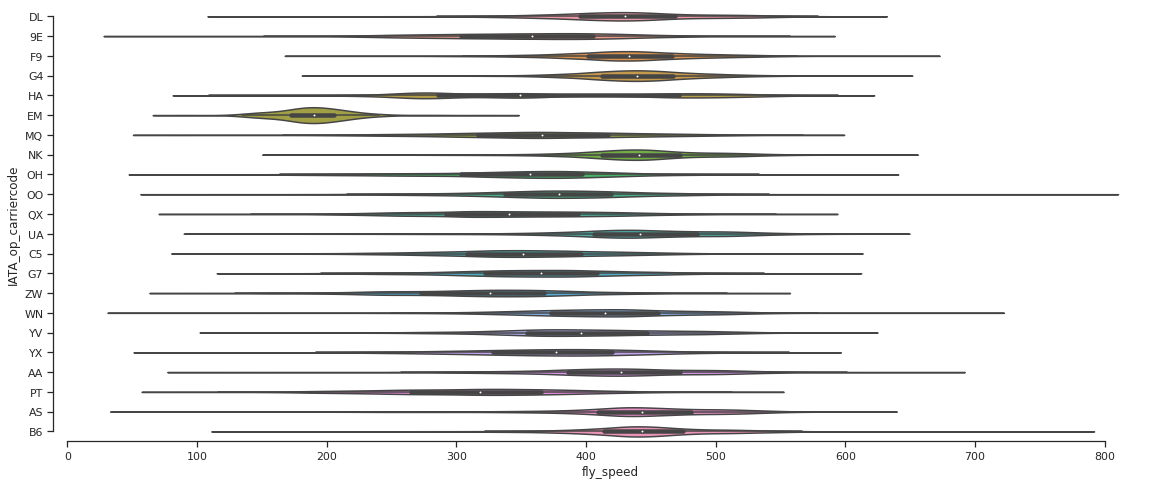

In [ ]:
#speed unit-Miles/hr
consolidatedSelectedColumns['fly_speed'] = consolidatedSelectedColumns['DISTANCE']/(consolidatedSelectedColumns['AIR_TIME']/60)
plt.figure(figsize=(20,8))
sns.set_context("notebook", font_scale=3)
sns.set(style="ticks", palette="muted", color_codes=True)
ax = sns.violinplot(x="fly_speed", y="IATA_op_carriercode", data=consolidatedSelectedColumns);
sns.despine(trim=True)

from the above EM-Empire Airlines Inc. seems to be slow, all the others are above 250 to 500 miles/hr

In [ ]:
#consolidatedSelectedColumns['fly_speed'].head()

### Flight Speed vs Total Delay

In [ ]:
#consolidatedSelectedColumns['fly_speed']consolidatedSelectedColumns['TOTALDELAY']

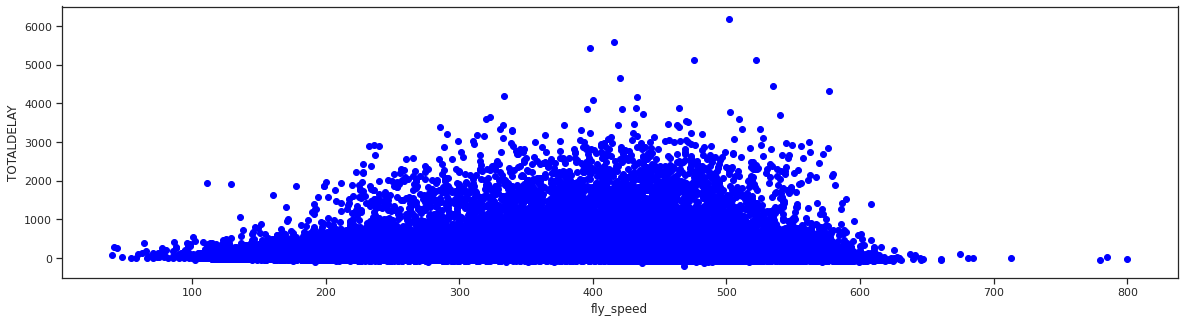

In [ ]:
ax=plt.subplot()
ax.scatter(consolidatedSelectedColumns['fly_speed'],consolidatedSelectedColumns['TOTALDELAY'],c='blue')
ax.set_xlabel("fly_speed")
ax.set_ylabel("TOTALDELAY")
plt.show()
plt.show()

From this correlation plot there is no proper evidence that speed affecting delays

In [ ]:
#pd.crosstab(consolidatedSelectedColumns['fly_speed'],consolidatedSelectedColumns['IATA_op_carriercode'],normalize=True)

In [ ]:
#consolidatedSelectedColumns.pivot_table(['fly_speed','TOTALDELAY'],['IATA_op_carriercode'],aggfunc='mean')

In [ ]:
consolidatedSelectedColumns[['TOTALDELAY','IATA_op_carriercode','fly_speed']][consolidatedSelectedColumns['TOTALDELAY']>180].groupby("IATA_op_carriercode").mean()

,TOTALDELAY,fly_speed
IATA_op_carriercode,,
9E,412.073776,344.443726
AA,456.218688,424.169720
AS,323.313358,433.699614
B6,361.319626,444.148847
C5,435.736842,349.480064
DL,425.899580,433.824015
F9,329.888992,433.946226
G4,441.187064,438.277807
G7,362.829208,360.696464


#**TAXI OUT-DEPARTURE,TAXI IN - ARRIVAL**


In [ ]:
taxioutmean = pd.DataFrame({'taxi_out_time' : consolidatedSelectedColumns.groupby(['IATA_op_carriercode'])['TAXI_OUT'].mean()}).reset_index()
taxiinmean = pd.DataFrame({'taxi_in_time' : consolidatedSelectedColumns.groupby(['IATA_op_carriercode'])['TAXI_IN'].mean()}).reset_index()

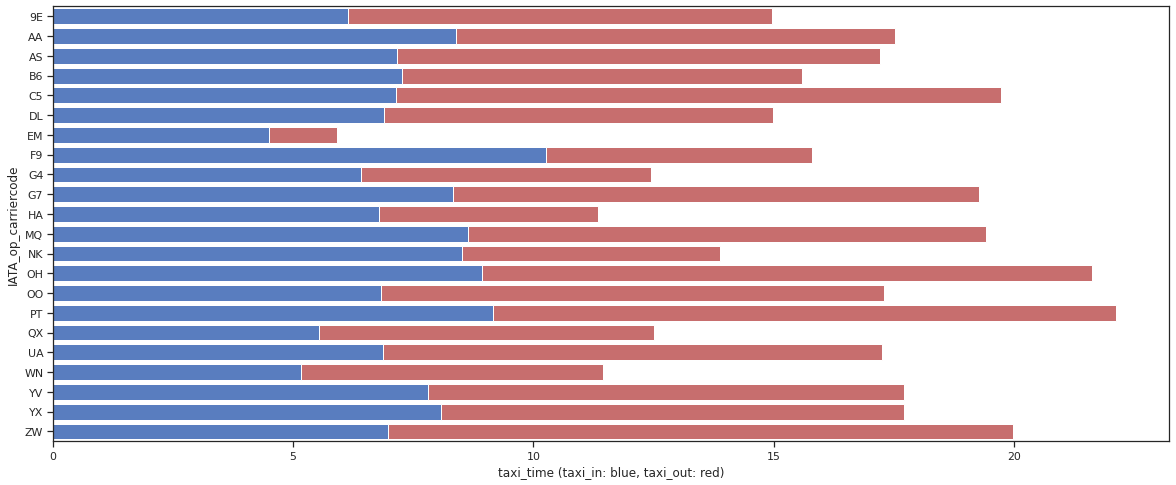

In [ ]:
ax=plt.figure(figsize=(20,8));
ax = sns.barplot(x="taxi_out_time", y="IATA_op_carriercode", data=taxioutmean, color="r");
ax = sns.barplot(x="taxi_in_time", y="IATA_op_carriercode", data=taxiinmean, color="b");
ax.set(xlabel="taxi_time (taxi_in: blue, taxi_out: red)");

In all the case taxi out time is greater than taxi in time

#ANALYSIS ON DELAY IN ALL AIRPORT FOR EACH CITY(ORIGIN AND DESTINATION) 

##MAPPING ORIGIN AIRPORT ID WITH ITS DESCRIPTION

In [ ]:
import csv

with open('/content/drive/MyDrive/AbiML/Colab Notebooks/colab datas/OriginAirportID-ORIGIN_AIRPORT_ID.csv', newline='') as csvfile:
  reader = csv.DictReader(csvfile)
 
  for row in reader:
      
    
   
        code=row['Code'] 
        description=row['Description']
        dict_from_csv = {rows['Code']:rows['Description'] for rows in reader}
      
  
dict_from_csv

{'10003': 'Granite Mountain, AK: Bear Creek Mining Strip',
 '10004': 'Lik, AK: Lik Mining Camp',
 '10005': 'Little Squaw, AK: Little Squaw Airport',
 '10006': 'Kizhuyak, AK: Kizhuyak Bay',
 '10007': 'Klawock, AK: Klawock Seaplane Base',
 '10008': 'Elizabeth Island, AK: Elizabeth Island Airport',
 '10009': 'Homer, AK: Augustin Island',
 '10010': 'Hudson, NY: Columbia County',
 '10011': 'Peach Springs, AZ: Grand Canyon West',
 '10012': 'Blairstown, NJ: Blairstown Airport',
 '10013': 'Crosbyton, TX: Crosbyton Municipal',
 '10014': 'Fairbanks/Ft. Wainwright, AK: Blair Lake',
 '10015': 'Deadmans Bay, AK: Deadmans Bay Airport',
 '10016': 'Hallo Bay, AK: Hallo Bay Airport',
 '10017': 'Red Lake, AK: Red Lake Airport',
 '10018': 'Shell Lake, AK: Shell Lake Airport',
 '10019': 'Kougarok, AK: Navigator Airstrip',
 '10020': 'Selawik, AK: Roland Norton Memorial',
 '10021': 'Pillar Bay, AK: Pillar Bay Airport',
 '10022': 'Johnstone Point, AK: Johnstone Point Airport',
 '10023': 'Tikchik Lodge, AK: T

In [ ]:
consolidatedSelectedColumns['ORIGIN_AIRPORT_ID_names'] = consolidatedSelectedColumns.ORIGIN_AIRPORT_ID.astype(str).map(dict_from_csv)
#titanictrain.groupby('Title').Title.count()
#consolidatedSelectedColumns['ORIGIN_AIRPORT_ID_names'] = consolidatedSelectedColumns['ORIGIN_AIRPORT_ID'].map(dict_from_csv)
consolidatedSelectedColumns[['ORIGIN_AIRPORT_ID','ORIGIN_AIRPORT_ID_names']].head(10)

,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_ID_names
0,11298,"Dallas/Fort Worth, TX: Dallas/Fort Worth Inter..."
1,14747,"Seattle, WA: Seattle/Tacoma International"
2,14869,"Salt Lake City, UT: Salt Lake City International"
3,14027,"West Palm Beach/Palm Beach, FL: Palm Beach Int..."
4,11433,"Detroit, MI: Detroit Metro Wayne County"
5,15304,"Tampa, FL: Tampa International"
6,12953,"New York, NY: LaGuardia"
7,13204,"Orlando, FL: Orlando International"
8,15304,"Tampa, FL: Tampa International"
9,14869,"Salt Lake City, UT: Salt Lake City International"


In [ ]:
#consolidatedSelectedColumns.drop('DEP_DELAY_AIRPORT_ID_mean',axis=1)

##ORIGIN AIRPORT DELAY ANALYSIS

In [ ]:
depdelaytop_AIRPORTID=consolidatedSelectedColumns[consolidatedSelectedColumns['DEP_DELAY']>=180]
def get_stats(group):
    return {'min': group.min(), 'max': group.max(),'count': group.count(), 'mean': group.mean()}
stats = depdelaytop_AIRPORTID['DEP_DELAY'].groupby(depdelaytop_AIRPORTID['ORIGIN_AIRPORT_ID_names']).apply(get_stats).unstack()
stats = stats.sort_values('mean',ascending=False)
stats

,min,max,count,mean
ORIGIN_AIRPORT_ID_names,,,,
"Iron Mountain/Kingsfd, MI: Ford",1291.0,1291.0,1.0,1291.0
"Santa Rosa, CA: Charles M. Schulz - Sonoma County",1074.0,1074.0,1.0,1074.0
"Lihue, HI: Lihue Airport",311.0,1347.0,4.0,820.0
"North Bend/Coos Bay, OR: Southwest Oregon Regional",287.0,1338.0,2.0,812.5
"Niagara Falls, NY: Niagara Falls International",211.0,1721.0,3.0,774.0
...,...,...,...,...
"Wilmington, DE: New Castle",202.0,202.0,1.0,202.0
"Bethel, AK: Bethel Airport",200.0,200.0,1.0,200.0
"Owensboro, KY: Owensboro Daviess County Regional",197.0,197.0,1.0,197.0


In [ ]:
#x=consolidatedSelectedColumns[['ORIGIN_CITY_NAME','ORIGIN_AIRPORT_ID','DEP_DELAY_AIRPORT_ID_mean']].groupby(['ORIGIN_AIRPORT_ID','ORIGIN_CITY_NAME'])['DEP_DELAY_AIRPORT_ID_mean'].mean().reset_index()
x=consolidatedSelectedColumns[consolidatedSelectedColumns['DEP_DELAY']>180].groupby(['ORIGIN_AIRPORT_ID_names','ORIGIN_CITY_NAME']).mean().reset_index()

#consolidatedSelectedColumns['DEP_DELAY_AIRPORT_ID_mean'] .head(20)
x1=x[['ORIGIN_CITY_NAME','ORIGIN_AIRPORT_ID_names','DEP_DELAY']].sort_values(by=['DEP_DELAY','ORIGIN_AIRPORT_ID_names'],ascending=[False,True]).head(20)
x1
#print(x[['ORIGIN_CITY_NAME','ORIGIN_AIRPORT_ID','DEP_DELAY_AIRPORT_ID_mean']].sort_values(by=['DEP_DELAY_AIRPORT_ID_mean','ORIGIN_AIRPORT_ID'],ascending=[False,True]).head(20))

,ORIGIN_CITY_NAME,ORIGIN_AIRPORT_ID_names,DEP_DELAY
150,"Iron Mountain/Kingsfd, MI","Iron Mountain/Kingsfd, MI: Ford",1291.000000
298,"Santa Rosa, CA","Santa Rosa, CA: Charles M. Schulz - Sonoma County",1074.000000
186,"Lihue, HI","Lihue, HI: Lihue Airport",820.000000
233,"North Bend/Coos Bay, OR","North Bend/Coos Bay, OR: Southwest Oregon Regi...",812.500000
231,"Niagara Falls, NY","Niagara Falls, NY: Niagara Falls International",774.000000
142,"Hobbs, NM","Hobbs, NM: Lea County Regional",748.666667
63,"Christiansted, VI","Christiansted, VI: Henry E. Rohlsen",703.333333
183,"Lewiston, ID","Lewiston, ID: Lewiston Nez Perce County",681.000000
347,"Williamsport, PA","Williamsport, PA: Williamsport Regional",670.000000
51,"Cedar City, UT","Cedar City, UT: Cedar City Regional",666.714286


In [ ]:
#consolidatedSelectedColumns['DEP_DELAY_AIRPORT_ID_mean'] = x.groupby('ORIGIN_AIRPORT_ID').DEP_DELAY.transform('mean')
#consolidatedSelectedColumns['DEP_DELAY_AIRPORT_ID_mean'].head(30)
#consolidatedSelectedColumns[['ORIGIN_CITY_NAME','ORIGIN_AIRPORT_ID']][consolidatedSelectedColumns['ORIGIN_AIRPORT_ID']].unique()

#[['ORIGIN_CITY_NAME','ORIGIN_AIRPORT_ID','DEP_DELAY_AIRPORT_ID_mean']].sort_values(by=['DEP_DELAY_AIRPORT_ID_mean','ORIGIN_AIRPORT_ID'],ascending=[False,True]).head(20))

In [ ]:
 consolidatedSelectedColumns['ORIGIN_CITY_NAME'].nunique()

369

In [ ]:
 consolidatedSelectedColumns['ORIGIN_AIRPORT_ID'].nunique()

375

In [ ]:
import plotly.express as px
fig = px.pie(x1, values='DEP_DELAY', names='ORIGIN_AIRPORT_ID_names',title=' DEPARTURE  DELAY IN ORIGIN AIRPORTS' )
fig.show()

##MAPPING DESTINATION AIRPORT ID WITH ITS DESCRIPTION

In [ ]:
with open('/content/drive/MyDrive/AbiML/Colab Notebooks/colab datas/DestAirportID_DEST_AIRPORT_ID.csv', newline='') as csvfile:
  reader = csv.DictReader(csvfile)
 
  for row in reader:
      
    
   
        code=row['Code'] 
        description=row['Description']
        dict_from_csv = {rows['Code']:rows['Description'] for rows in reader}
      
  
dict_from_csv

{'10003': 'Granite Mountain, AK: Bear Creek Mining Strip',
 '10004': 'Lik, AK: Lik Mining Camp',
 '10005': 'Little Squaw, AK: Little Squaw Airport',
 '10006': 'Kizhuyak, AK: Kizhuyak Bay',
 '10007': 'Klawock, AK: Klawock Seaplane Base',
 '10008': 'Elizabeth Island, AK: Elizabeth Island Airport',
 '10009': 'Homer, AK: Augustin Island',
 '10010': 'Hudson, NY: Columbia County',
 '10011': 'Peach Springs, AZ: Grand Canyon West',
 '10012': 'Blairstown, NJ: Blairstown Airport',
 '10013': 'Crosbyton, TX: Crosbyton Municipal',
 '10014': 'Fairbanks/Ft. Wainwright, AK: Blair Lake',
 '10015': 'Deadmans Bay, AK: Deadmans Bay Airport',
 '10016': 'Hallo Bay, AK: Hallo Bay Airport',
 '10017': 'Red Lake, AK: Red Lake Airport',
 '10018': 'Shell Lake, AK: Shell Lake Airport',
 '10019': 'Kougarok, AK: Navigator Airstrip',
 '10020': 'Selawik, AK: Roland Norton Memorial',
 '10021': 'Pillar Bay, AK: Pillar Bay Airport',
 '10022': 'Johnstone Point, AK: Johnstone Point Airport',
 '10023': 'Tikchik Lodge, AK: T

In [ ]:
consolidatedSelectedColumns['DEST_AIRPORT_ID_names'] = consolidatedSelectedColumns.DEST_AIRPORT_ID.astype(str).map(dict_from_csv)
#titanictrain.groupby('Title').Title.count()
#consolidatedSelectedColumns['ORIGIN_AIRPORT_ID_names'] = consolidatedSelectedColumns['ORIGIN_AIRPORT_ID'].map(dict_from_csv)
consolidatedSelectedColumns[['DEST_AIRPORT_ID','DEST_AIRPORT_ID_names']].head(10)

,DEST_AIRPORT_ID,DEST_AIRPORT_ID_names
0,11433,"Detroit, MI: Detroit Metro Wayne County"
1,14869,"Salt Lake City, UT: Salt Lake City International"
2,14747,"Seattle, WA: Seattle/Tacoma International"
3,11433,"Detroit, MI: Detroit Metro Wayne County"
4,15304,"Tampa, FL: Tampa International"
5,11433,"Detroit, MI: Detroit Metro Wayne County"
6,13204,"Orlando, FL: Orlando International"
7,12953,"New York, NY: LaGuardia"
8,11433,"Detroit, MI: Detroit Metro Wayne County"
9,14747,"Seattle, WA: Seattle/Tacoma International"


##DESTINATION AIRPORT DELAY ANALYSIS

In [ ]:
consolidatedSelectedColumns['DEST_CITY_NAME'].nunique()

369

In [ ]:
x2=consolidatedSelectedColumns[consolidatedSelectedColumns['ARR_DELAY']>180].groupby(['DEST_AIRPORT_ID_names','DEST_CITY_NAME']).mean().reset_index()
x3=x2[['DEST_CITY_NAME','DEST_AIRPORT_ID_names','ARR_DELAY']].sort_values(by=['ARR_DELAY','DEST_AIRPORT_ID_names'],ascending=[False,True]).head(20)
x3

,DEST_CITY_NAME,DEST_AIRPORT_ID_names,ARR_DELAY
287,"Sault Ste. Marie, MI","Sault Ste. Marie, MI: Chippewa County Internat...",1257.000000
174,"Lawton/Fort Sill, OK","Lawton/Fort Sill, OK: Lawton-Fort Sill Regional",1002.600000
211,"Mosinee, WI","Mosinee, WI: Central Wisconsin",942.500000
261,"Rhinelander, WI","Rhinelander, WI: Rhinelander/Oneida County",878.000000
238,"Pellston, MI","Pellston, MI: Pellston Regional Airport of Emm...",848.500000
96,"Elmira/Corning, NY","Elmira/Corning, NY: Elmira/Corning Regional",846.000000
216,"New Bern/Morehead/Beaufort, NC","New Bern/Morehead/Beaufort, NC: Coastal Caroli...",785.000000
197,"Meridian, MS","Meridian, MS: Key Field",772.500000
158,"Kalamazoo, MI","Kalamazoo, MI: Kalamazoo/Battle Creek Internat...",765.000000
86,"Devils Lake, ND","Devils Lake, ND: Devils Lake Regional",762.454545


In [ ]:
import plotly.express as px
fig = px.pie(x3, values='ARR_DELAY', names='DEST_AIRPORT_ID_names',title=' ARRIVAL DELAY IN ORIGIN AIRPORTS' )
fig.show()

In [ ]:
#originairportid=pd.read_csv('/content/drive/MyDrive/AbiML/Colab Notebooks/colab datas/ORIGIN AIRPORT ID.csv')

In [ ]:
#destairportid=pd.read_csv("/content/drive/MyDrive/AbiML/Colab Notebooks/colab datas/DestAirportID.-DEST_AIRPORT_IDcsv.txt")